In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import math
%matplotlib inline

In [2]:
def process_one_team(team_name):
    df = pd.read_csv("../../Data/assists_inside_team/" + team_name + ".csv")
    return df

In [3]:
nba_teams = ["ATL", "BKN", "BOS", "CHA", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", 
             "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHX", "POR", "SAC", "SAS", "TOR", 
             "UTA", "WAS"]

In [4]:
nba_color_codes = {
    "ATL" : ["#000000", "#E03A3E", "#C3D600"],
    "BKN" : ["#000000", "#FFFFFF"],
    "BOS" : ["#000000", "#008348", "#C0C0C0", "#FFFFFF"], 
    "CHA" : ["#1D1160", "#008CA8", "#A1A1A4", "#FFFFFF"],
    "CHI" : ["#000000", "#CE1141", "#FFFFFF"],
    "CLE" : ["#002D62", "#860038", "#FDBB30"],
    "DAL" : ["#000000", "#20385B", "#007DC5", "#C4CED3", "#FFFFFF"],
    "DEN" : ["#004770", "#4FA8FF", "#FFB20F", "#FFFFFF"],
    "DET" : ["#001F70", "#006BB6", "#ED174C", "#FFFFFF"], 
    "GSW" : ["#006BB6", "#FFC72D"],
    "HOU" : ["#CE1141", "#C4CED3", "#FFFFFF"],
    "IND" : ["#00275D", "#FFC633", "#FFFFFF"],
    "LAC" : ["#00285D", "#006BB6", "#ED174C", "#FFFFFF"],
    "LAL" : ["#552582", "#FDB927", "#FFFFFF"],
    "MEM" : ["#23375B", "#6189B9", "#BBD1E4", "#DDDDDD"],
    "MIA" : ["#000000", "#98002E", "#FFFFFF"],
    "MIL" : ["#00471B", "#EEE1C6", "#FFFFFF"],
    "MIN" : ["#002B5C", "#005083", "#7AC143", "#C6CFD4", "#FFFFFF"],
    "NOP" : ["#002B5C", "#B4975A", "#FFFFFF"],
    "NYK" : ["#006BB6", "#F58426", "#BEC0C2", "#FFFFFF"],
    "OKC" : ["#002D62", "#007DC3", "#F05133", "#FDBB30"],
    "ORL" : ["#000000", "#007DC5", "#C4CED3", "#FFFFFF"],
    "PHI" : ["#006BB6", "#ED174C", "#FFFFFF"],
    "PHX" : ["#000000", "#1D1160", "#E56020", "#63717A", "#FFFFFF"],
    "POR" : ["#000000", "#F0163A", "#B6BFBF", "#FFFFFF"],
    "SAC" : ["#724C9F", "#8E9090", "#FFFFFF"],
    "SAS" : ["#000000", "#B6BFBF", "#FFFFFF"],
    "TOR" : ["#000000", "#CE1141", "#C4CED3", "#FFFFFF"],
    "UTA" : ["#002B5C", "#F9A01B", "#BEC0C2"],
    "WAS" : ["#002566", "#F5002F", "#C2CCCC", "#FFFFFF"]
}

In [396]:
nba_colormaps = {
    "ATL" : "OrRd",
    "BKN" : "Greys",
    "BOS" : "Greens", 
    "CHA" : sns.blend_palette(colors=["#F2F2FA", "#008CA8", "#1D1160"], as_cmap=True),
    "CHI" : sns.blend_palette(colors=["#FFF0F0", "#CE1141", "#670101", "#050505"], as_cmap=True),
    "CLE" : sns.blend_palette(colors=["#FDFBD9", "#860038"], as_cmap=True),
    "DAL" : sns.blend_palette(colors=["#F0F0FF", "#007DC5", "#20385B", "#002646", "#040404"], as_cmap=True),
    "DEN" : sns.blend_palette(colors=["#FFFFE4", "#4FA8FF", "#004770"], as_cmap=True),
    "DET" : sns.blend_palette(colors=["#F2F2FF", "#506BB6"], as_cmap=True),
    "GSW" : "YlGnBu",
    "HOU" : sns.blend_palette(colors=["#FFF3F3", "#CE1141"], as_cmap=True),
    "IND" : sns.blend_palette(colors=["#FFFEE3", "#00275D"], as_cmap=True),
    "LAC" : sns.blend_palette(colors=["#FFF4FF", "#006BB6", "#00285D"], as_cmap=True),
    "LAL" : sns.blend_palette(colors=["#FFFDCA", "#552582", "#381756"], as_cmap=True),
    "MEM" : sns.blend_palette(colors=["#F3F3FF", "#6189B9", "#23375B"], as_cmap=True),
    "MIA" : sns.blend_palette(colors=["#FFF0F0", "#98002E", "#050505"], as_cmap=True),
    "MIL" : "YlGn",
    "MIN" : "GnBu",
    "NOP" : sns.blend_palette(colors=["#F7F7D4", "#002B5C"], as_cmap=True),
    "NYK" : sns.blend_palette(colors=["#F7FBFF", "#006BB6"], as_cmap=True),
    "OKC" : sns.blend_palette(colors=["#FFF7ED", "#FDBB30", "#F05133"], as_cmap=True),
    "ORL" : sns.blend_palette(colors=["#F4F4F4", "#007DC5", "#002646", "#0D0D0D"], as_cmap=True),
    "PHI" : sns.blend_palette(colors=["#FFF6FF","#A2B0FF", "#006BB6"], as_cmap=True),
    "PHX" : sns.blend_palette(colors=["#FFFAE3", "#ED6D2F", "#534C7F", "#322770", "#241675"], as_cmap=True),
    "POR" : sns.blend_palette(colors=["#F5F5F5", "#F0163A", "#050505"], as_cmap=True),
    "SAC" : "Purples",
    "SAS" : "Greys",
    "TOR" : sns.blend_palette(colors=["#F6F6F6", "#CE1141", "#050505"], as_cmap=True),
    "UTA" : sns.blend_palette(colors=["#FFFFDD", "#002B5C"], as_cmap=True),
    "WAS" : sns.blend_palette(colors=["#FFF6FD","#A5C6FF", "#002566"], as_cmap=True),
}

In [397]:
nba_abbrev_names = {
    "ATL" : "Atlanta Hawks",
    "BKN" : "Brooklyn Nets",
    "BOS" : "Boston Celtics",
    "CHA" : "Charlotte Hornets",
    "CHI" : "Chicago Bulls",
    "CLE" : "Cleveland Cavaliers",
    "DAL" : "Dallas Mavericks",
    "DEN" : "Denver Nuggets",
    "DET" : "Detroit Pistons",
    "GSW" : "Golden State Warriors",
    "HOU" : "Houston Rockets",
    "IND" : "Indiana Pacers",
    "LAC" : "Los Angeles Clippers",
    "LAL" : "Los Angeles Lakers",
    "MEM" : "Memphis Grizzlies",
    "MIA" : "Miami Heat",
    "MIL" : "Milwaukee Bucks",
    "MIN" : "Minnesota Timberwolves",
    "NOP" : "New Orleans Pelicans",
    "NYK" : "New York Knicks",
    "OKC" : "Oklahoma City Thunder",
    "ORL" : "Orlando Magic",
    "PHI" : "Philadelphia 76ers",
    "PHX" : "Phoenix Suns",
    "POR" : "Portland Trail Blazers",
    "SAC" : "Sacramento Kings",
    "SAS" : "San Antonio Spurs",
    "TOR" : "Toronto Raptors",
    "UTA" : "Utah Jazz",
    "WAS" : "Washington Wizards"
}

In [398]:
def get_team_frame(team_name):
    df = process_one_team(team_name)
    passer_counts = df['Passer'].value_counts()
    scorer_counts = df['Scorer'].value_counts()
    total_counts = {}
    for key in set(scorer_counts.index.tolist() + passer_counts.index.tolist()):
        total_sum = 0
        if key in scorer_counts:
            total_sum += scorer_counts[key]
        if key in passer_counts:
            total_sum += passer_counts[key]
        total_counts[key] = total_sum
    sorted_counts = sorted(total_counts.items(), key=operator.itemgetter(1), reverse=True)
    sorted_counts = sorted_counts[10:]
    keys = [item[0] for item in sorted_counts]
    df = df.drop(df[df.Passer.isin(keys)].index)
    df = df.drop(df[df.Scorer.isin(keys)].index)
    df = df[df['Passer'] != df['Scorer']]
    df = df.groupby(["Passer", "Scorer"]).size().reset_index(name="Count")
    df = df.pivot(index='Passer', columns='Scorer', values='Count', )
    for key in df.index.tolist():
        curr_series = df[key]
        for value in curr_series.index.tolist():
            if math.isnan(df[key][value]):
                df[key][value] = 0
    return df

In [408]:
def plot_heatmap(df, team_name):
    plt.figure(figsize=(19, 19))
    #cbar_kws={"orientation":"horizontal", "shrink" : 0.5, "pad" : 0.2},
    plot = sns.heatmap(df, cbar=False, annot=True, annot_kws={"size": 14}, fmt="g", cmap=nba_colormaps[team_name])
    y_ticklabels = [tick.get_text() for tick in plot.get_yticklabels()]
    x_ticklabels = [tick.get_text() for tick in plot.get_xticklabels()]
    plot.set_yticklabels(y_ticklabels, rotation=0, size=14)
    plot.set_xticklabels(x_ticklabels, rotation=90, size=14)
    plot.set_ylabel(plot.get_ylabel(), size=16)
    plot.set_xlabel(plot.get_xlabel(), size=16)
    plot.set_title('Assist distribution between players of ' + nba_abbrev_names[team_name], size=18)
    plt.savefig("images/" + team_name + ".png")

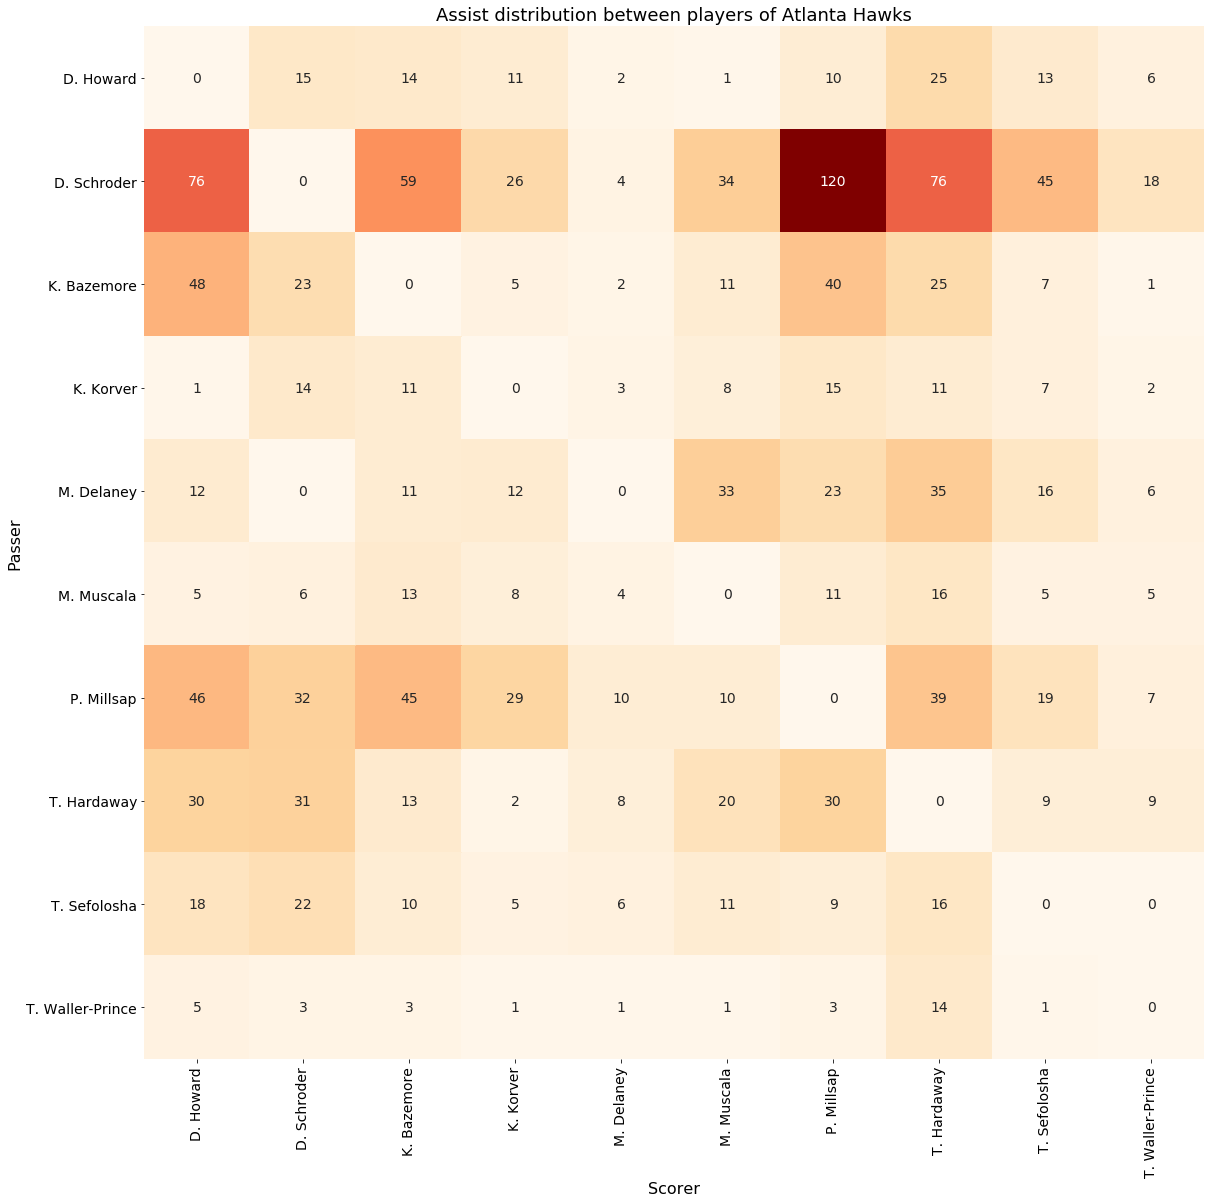

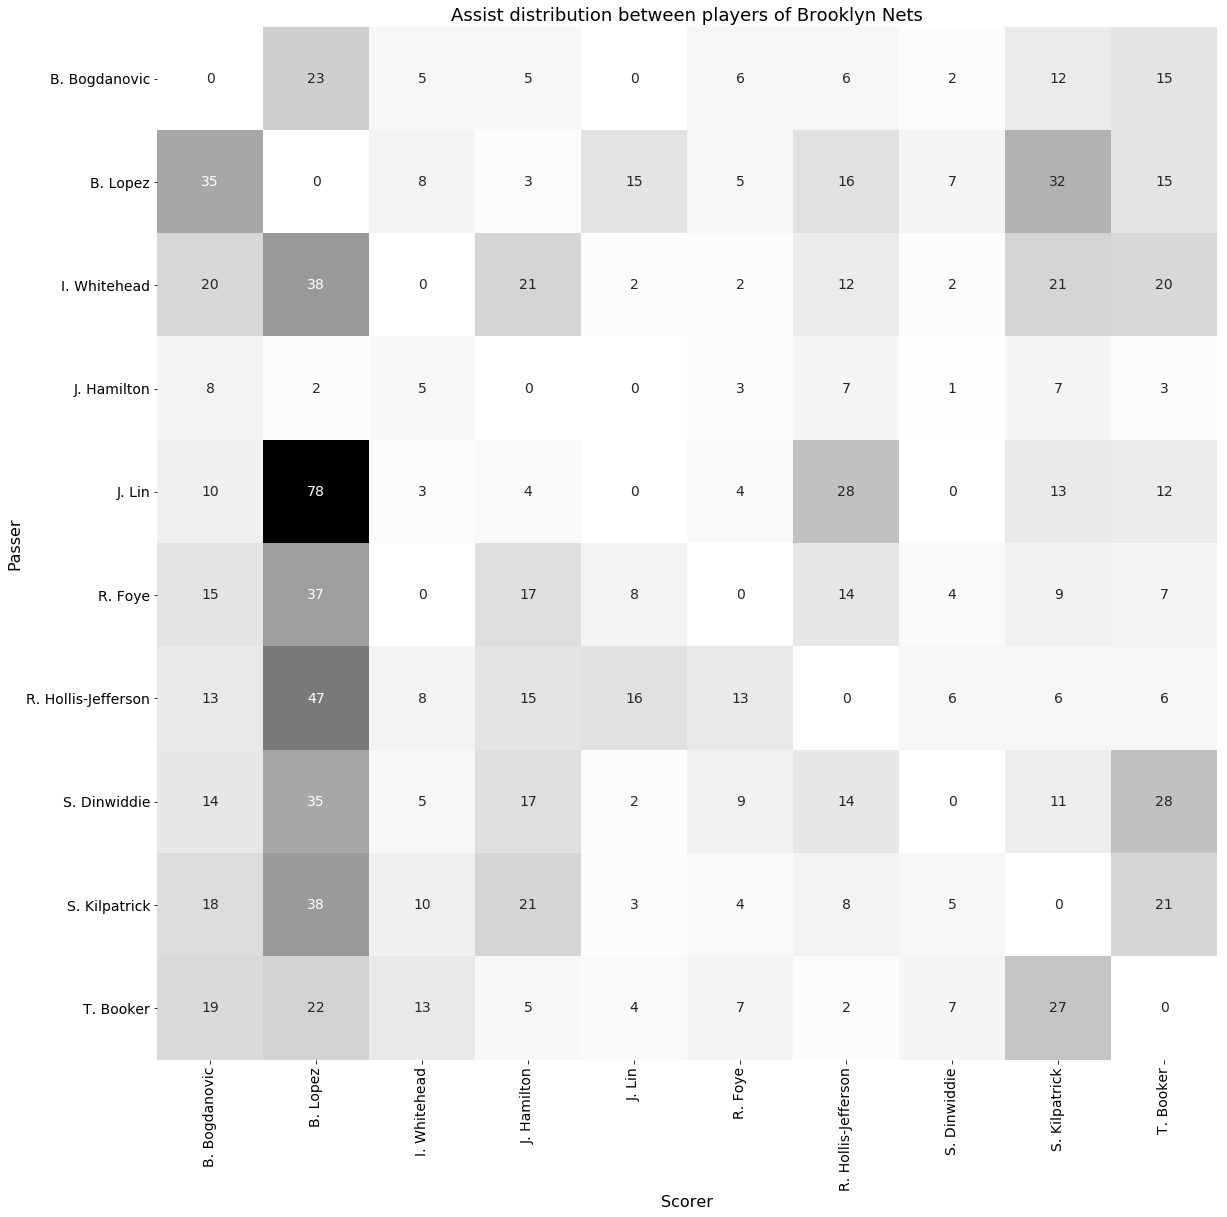

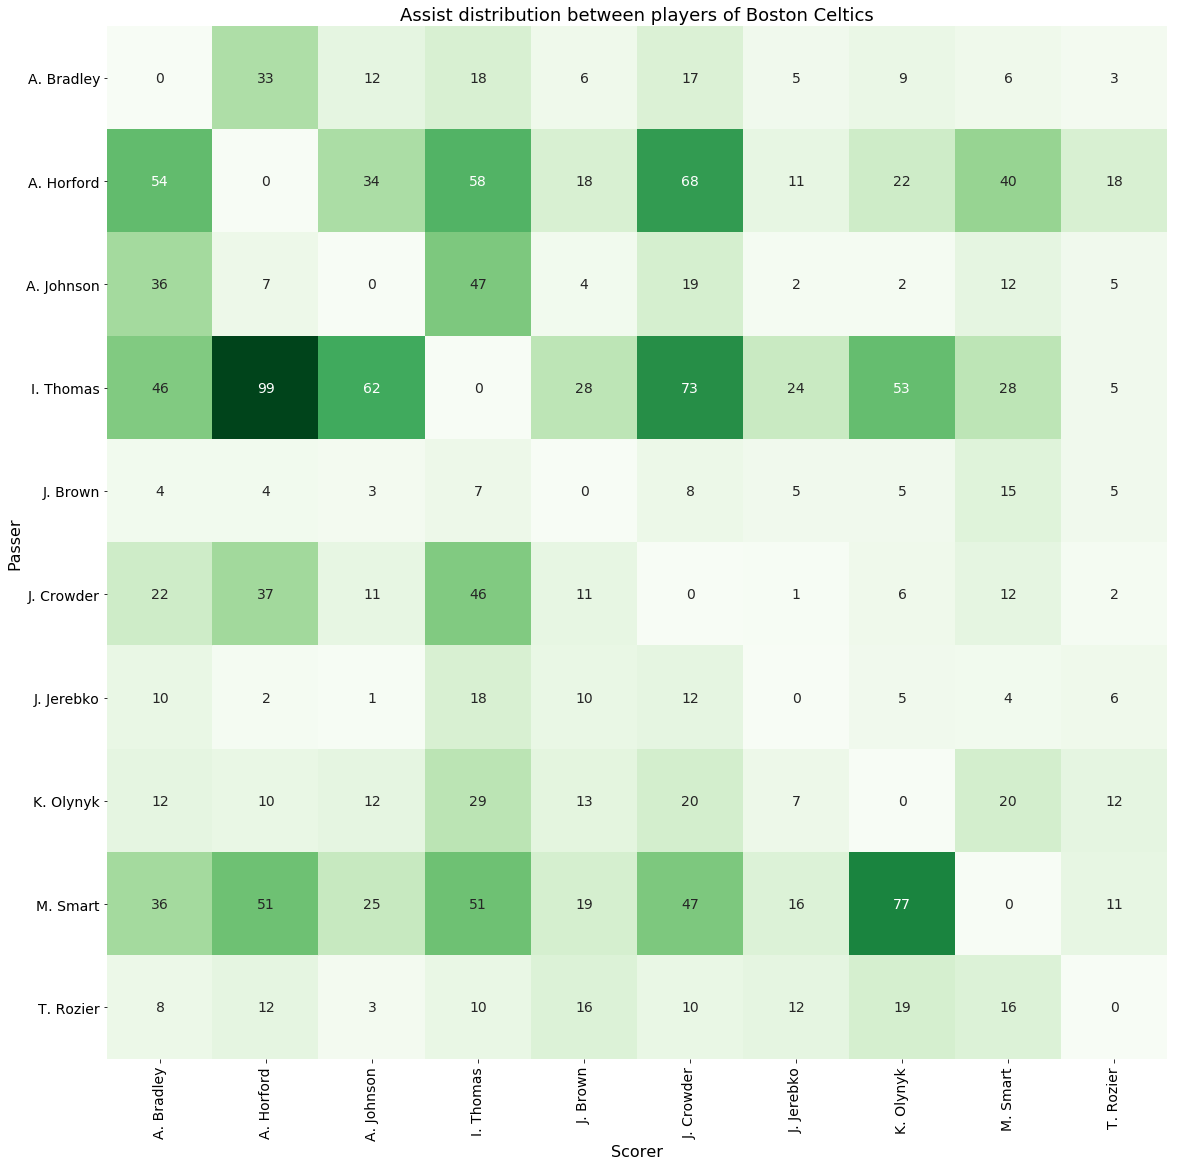

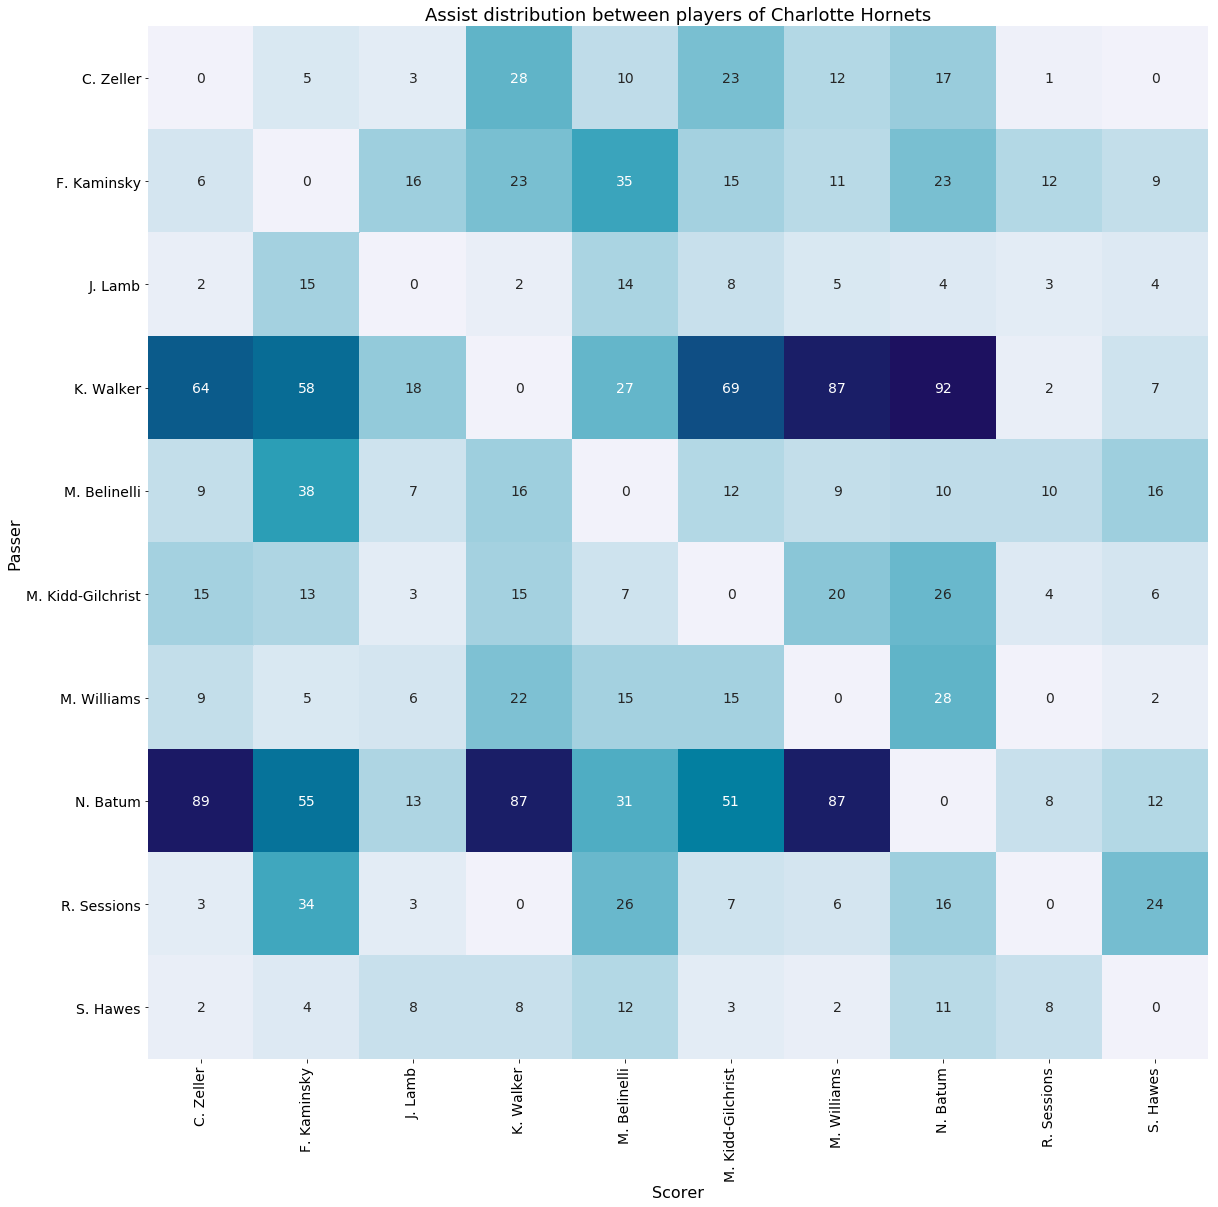

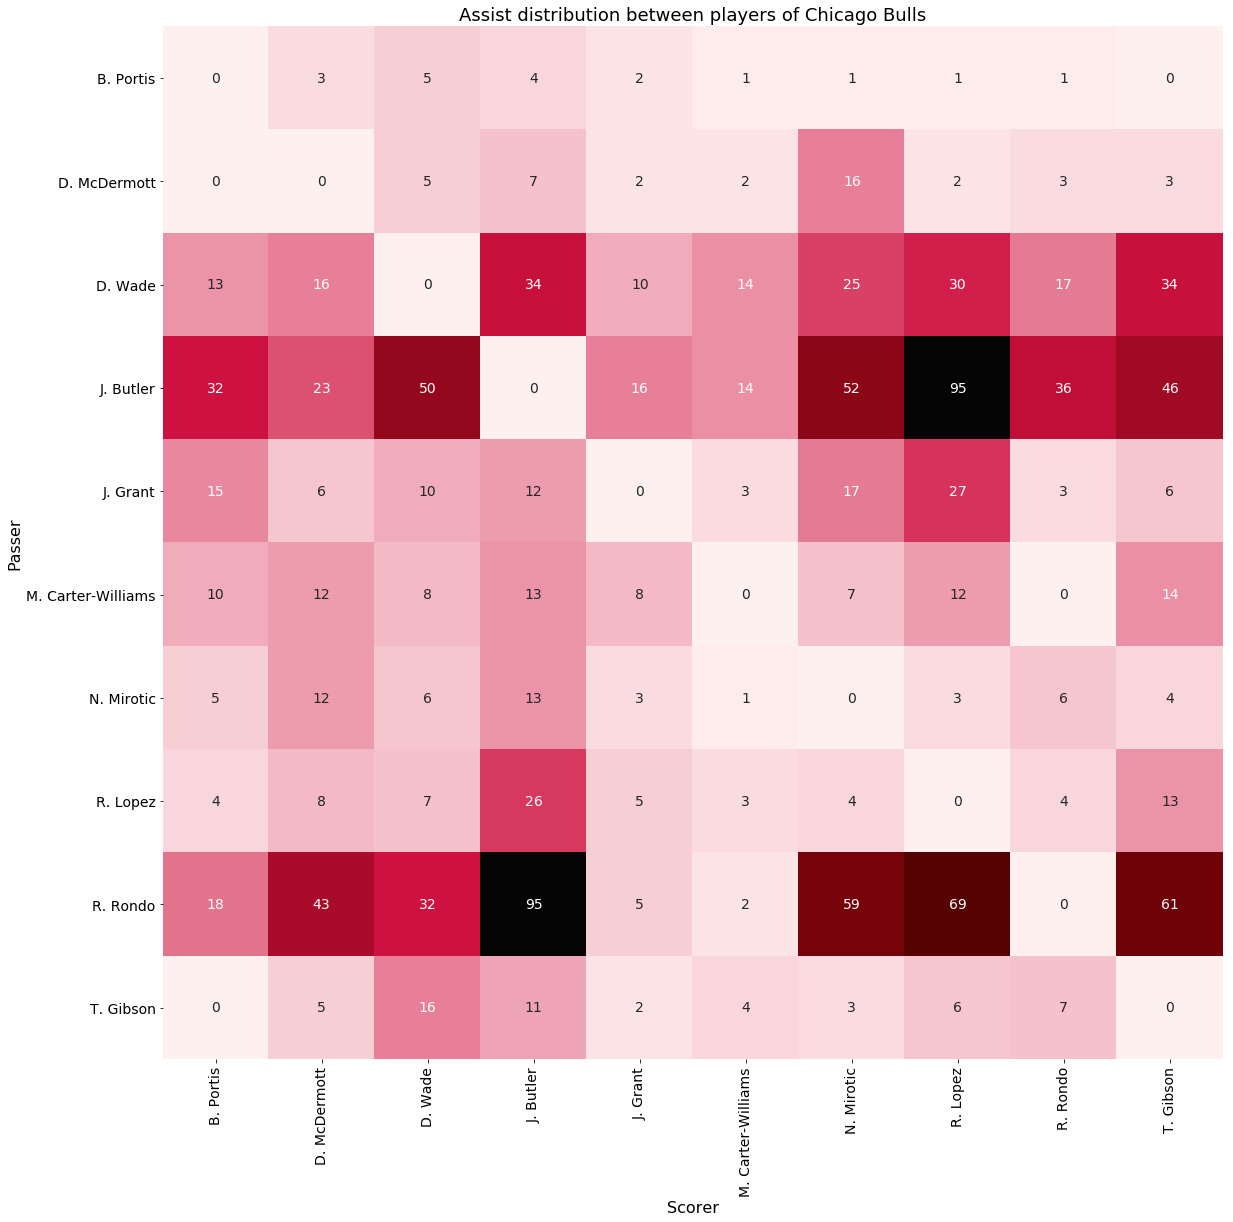

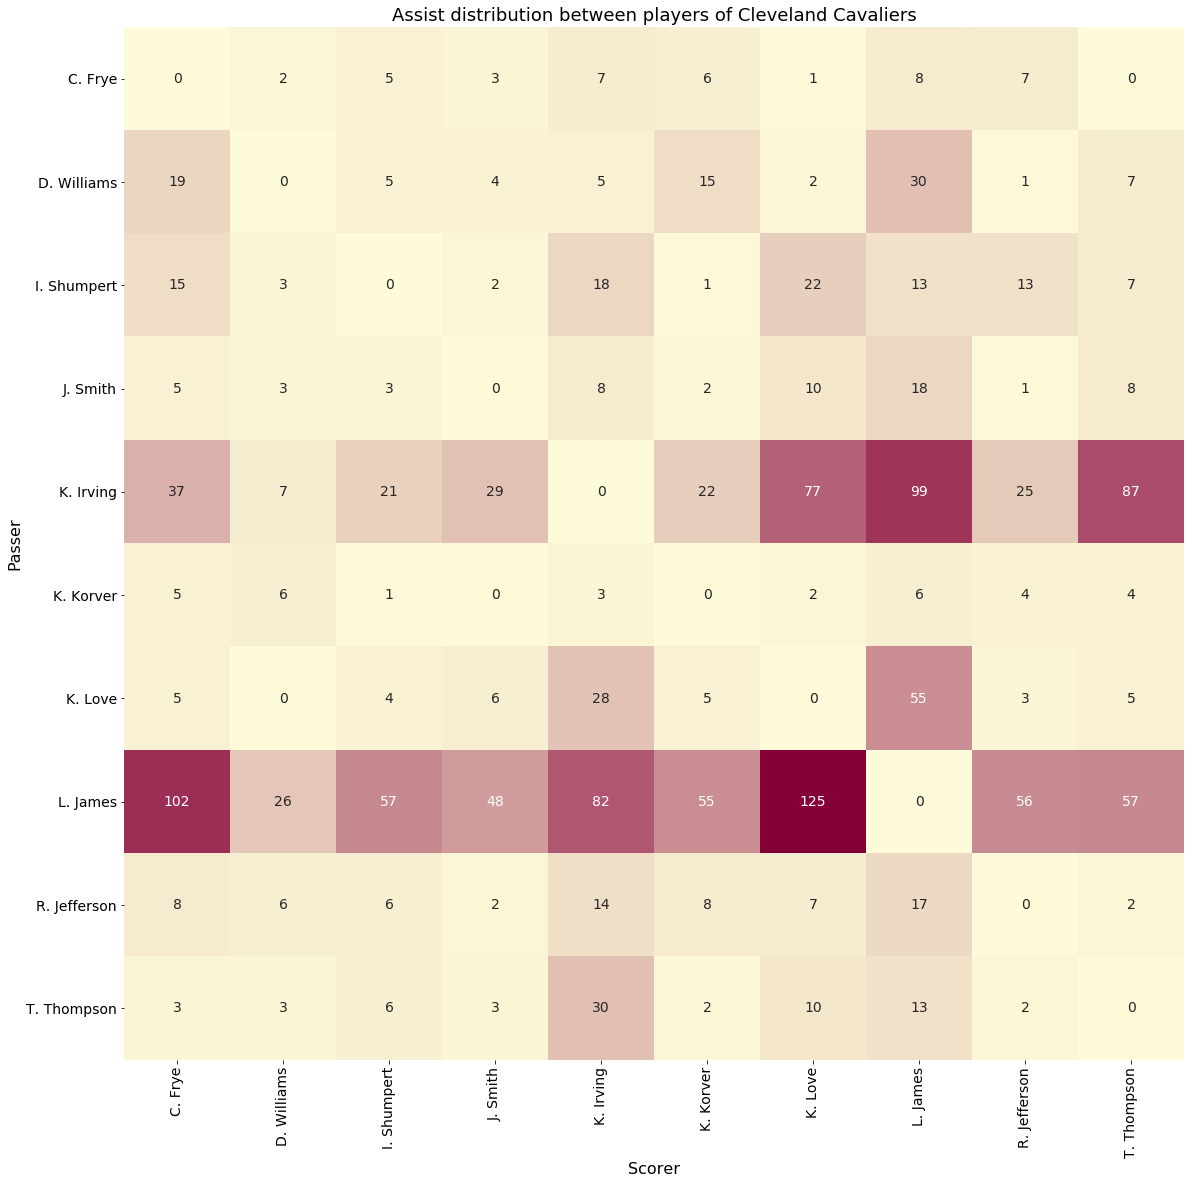

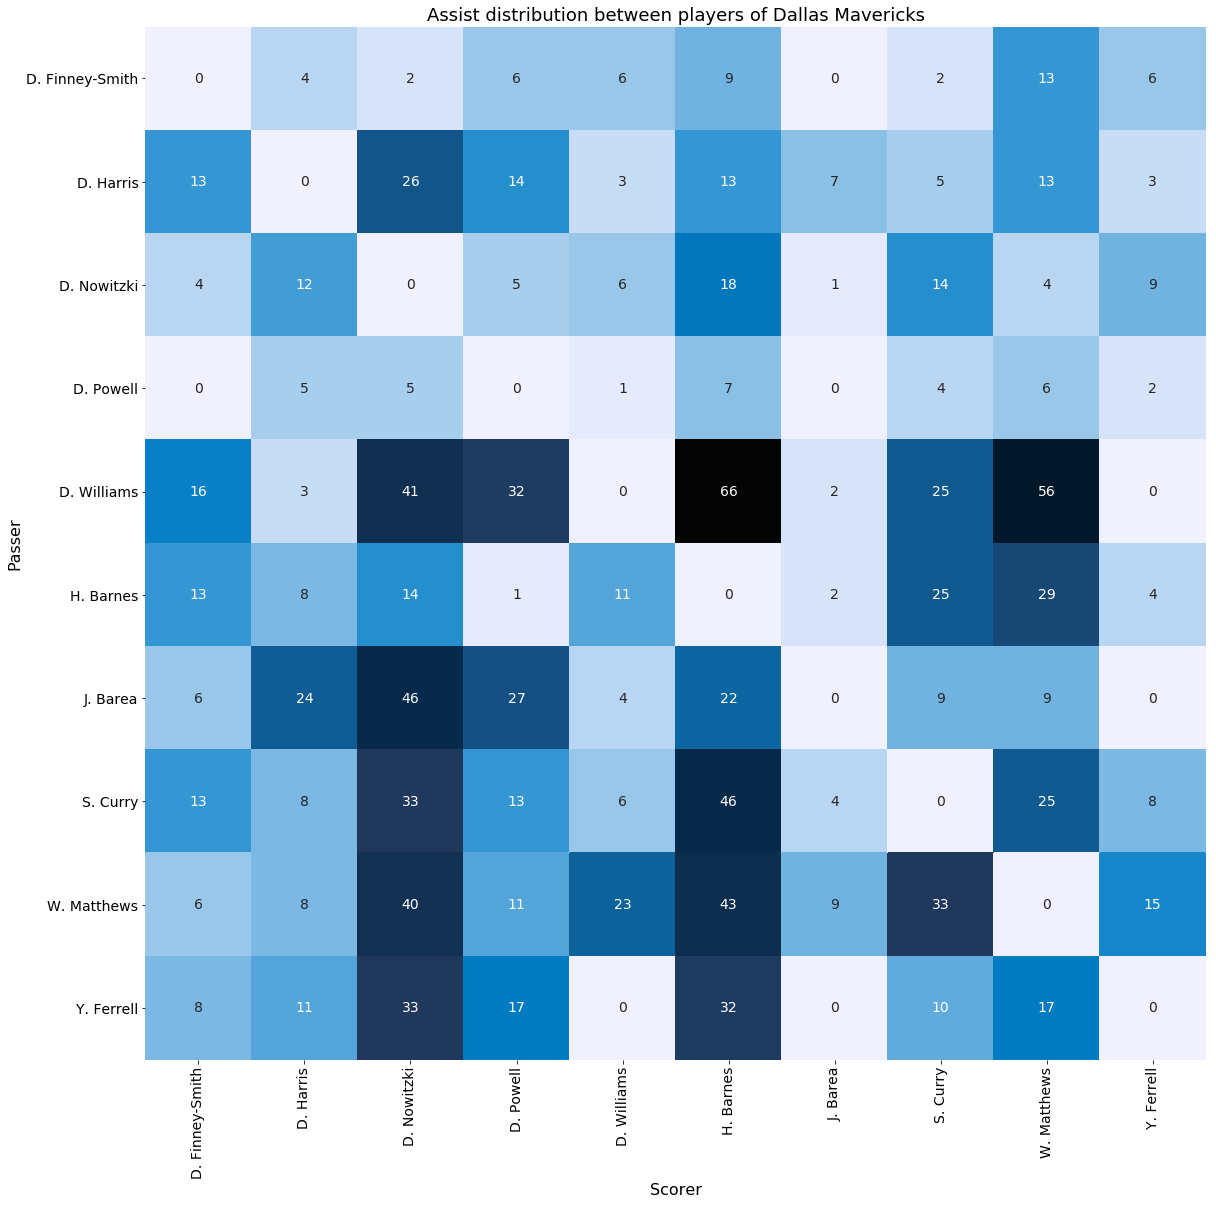

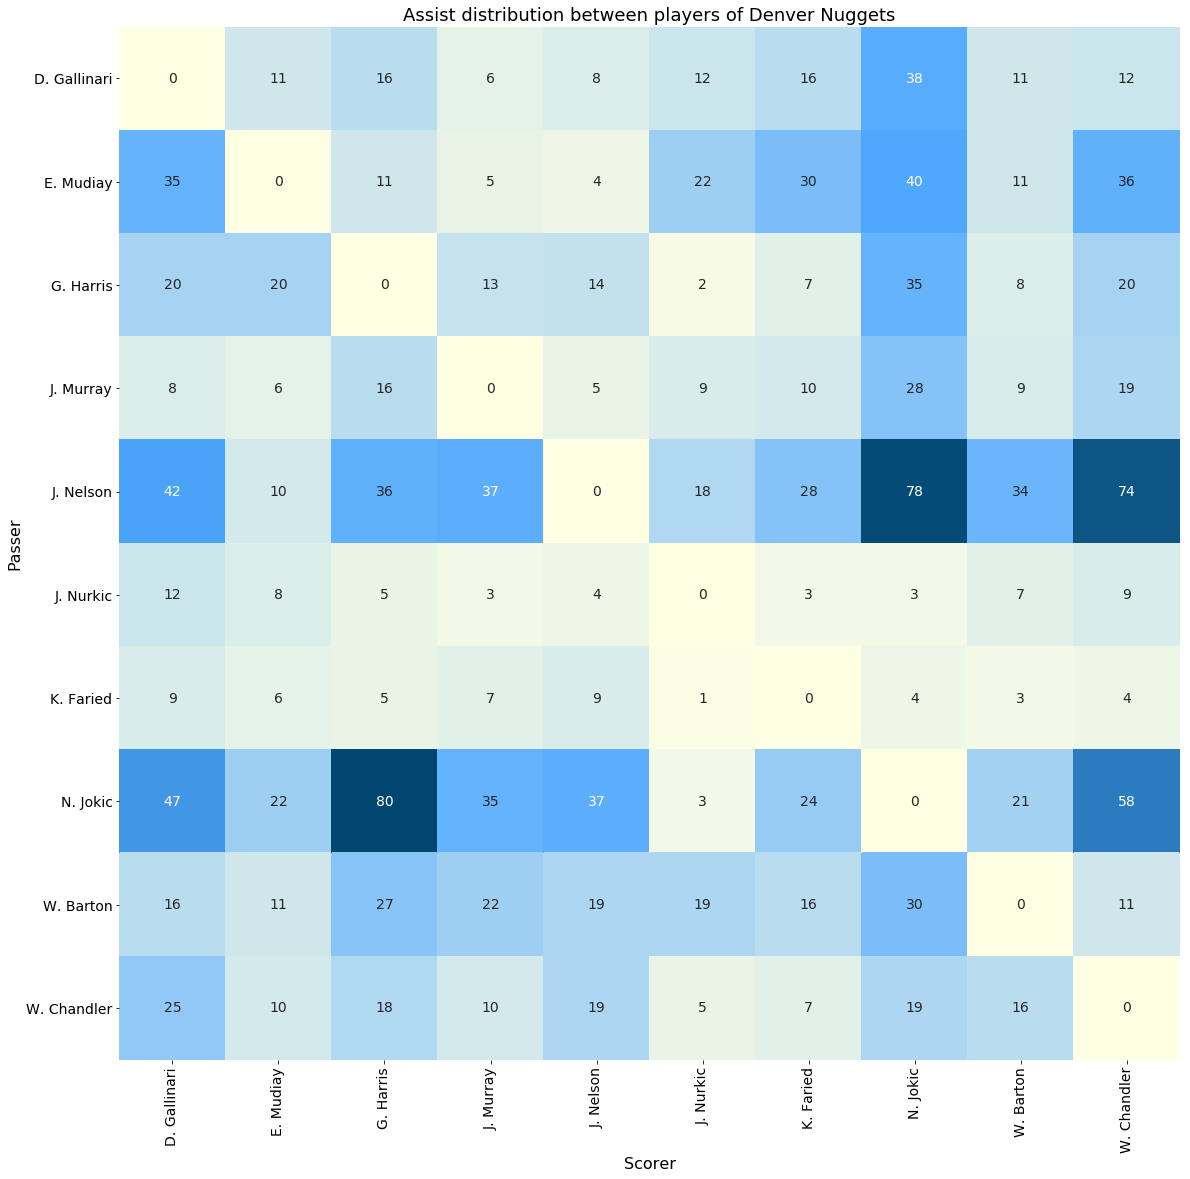

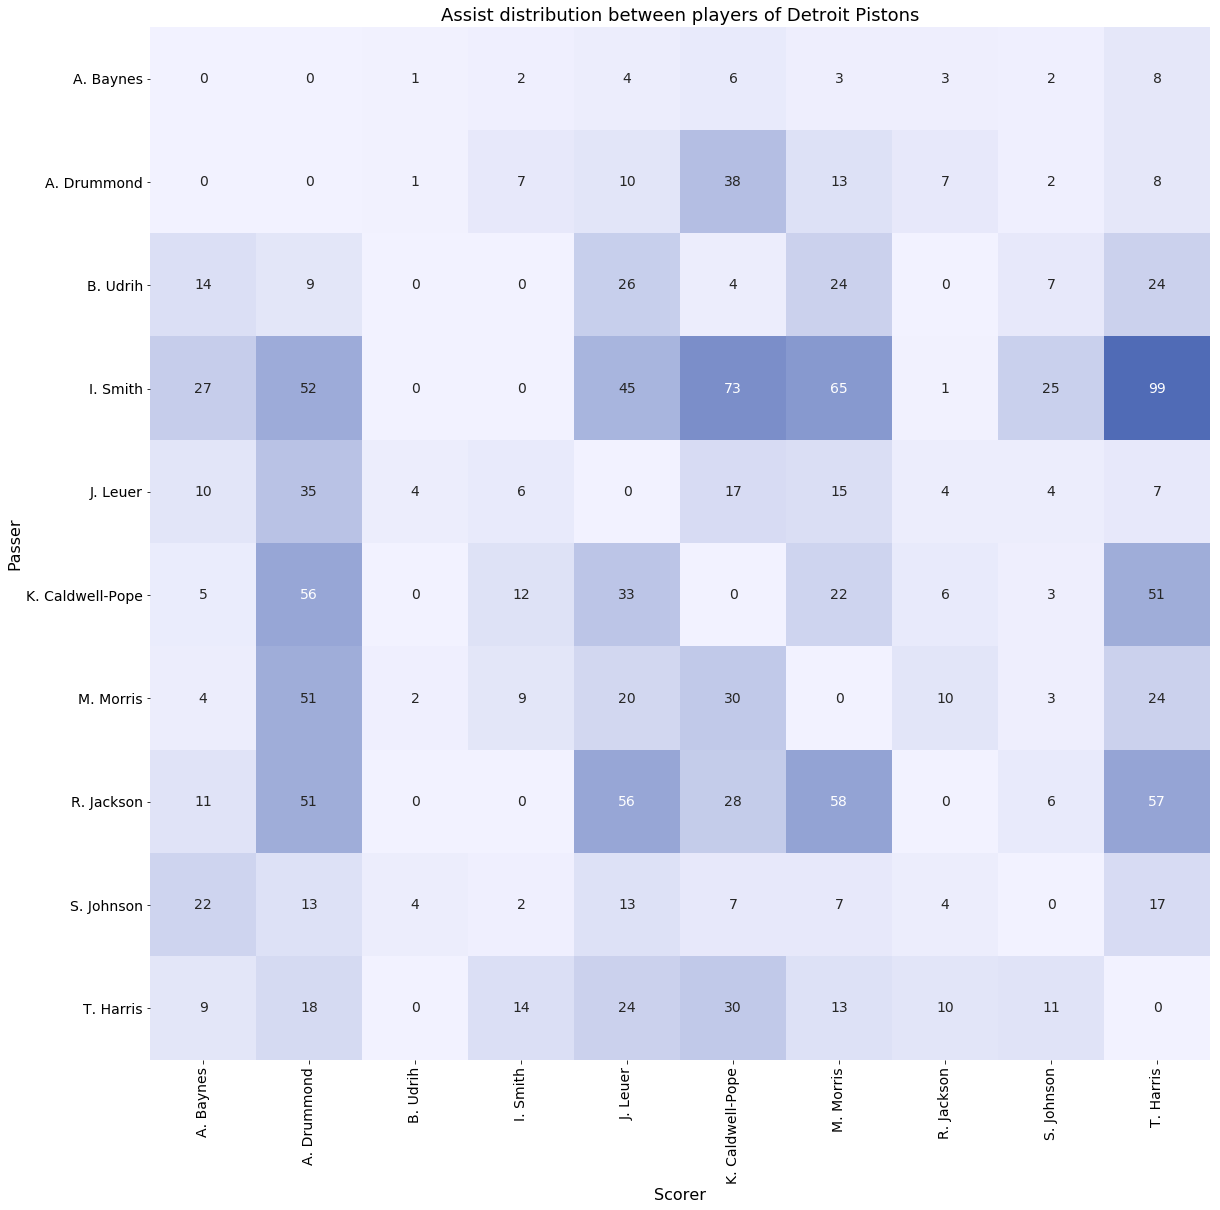

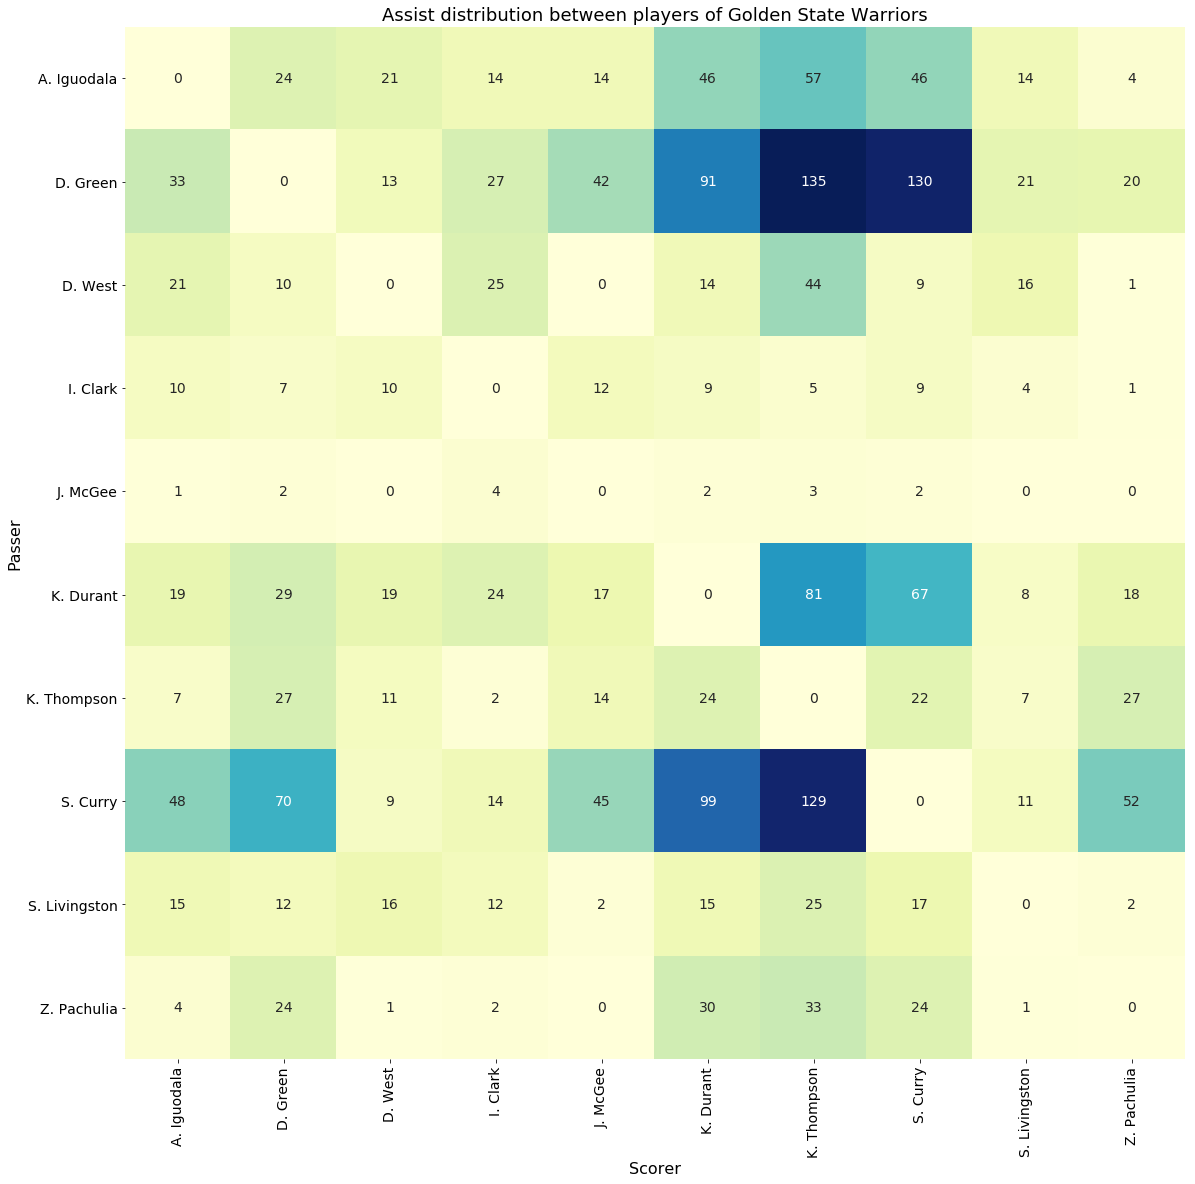

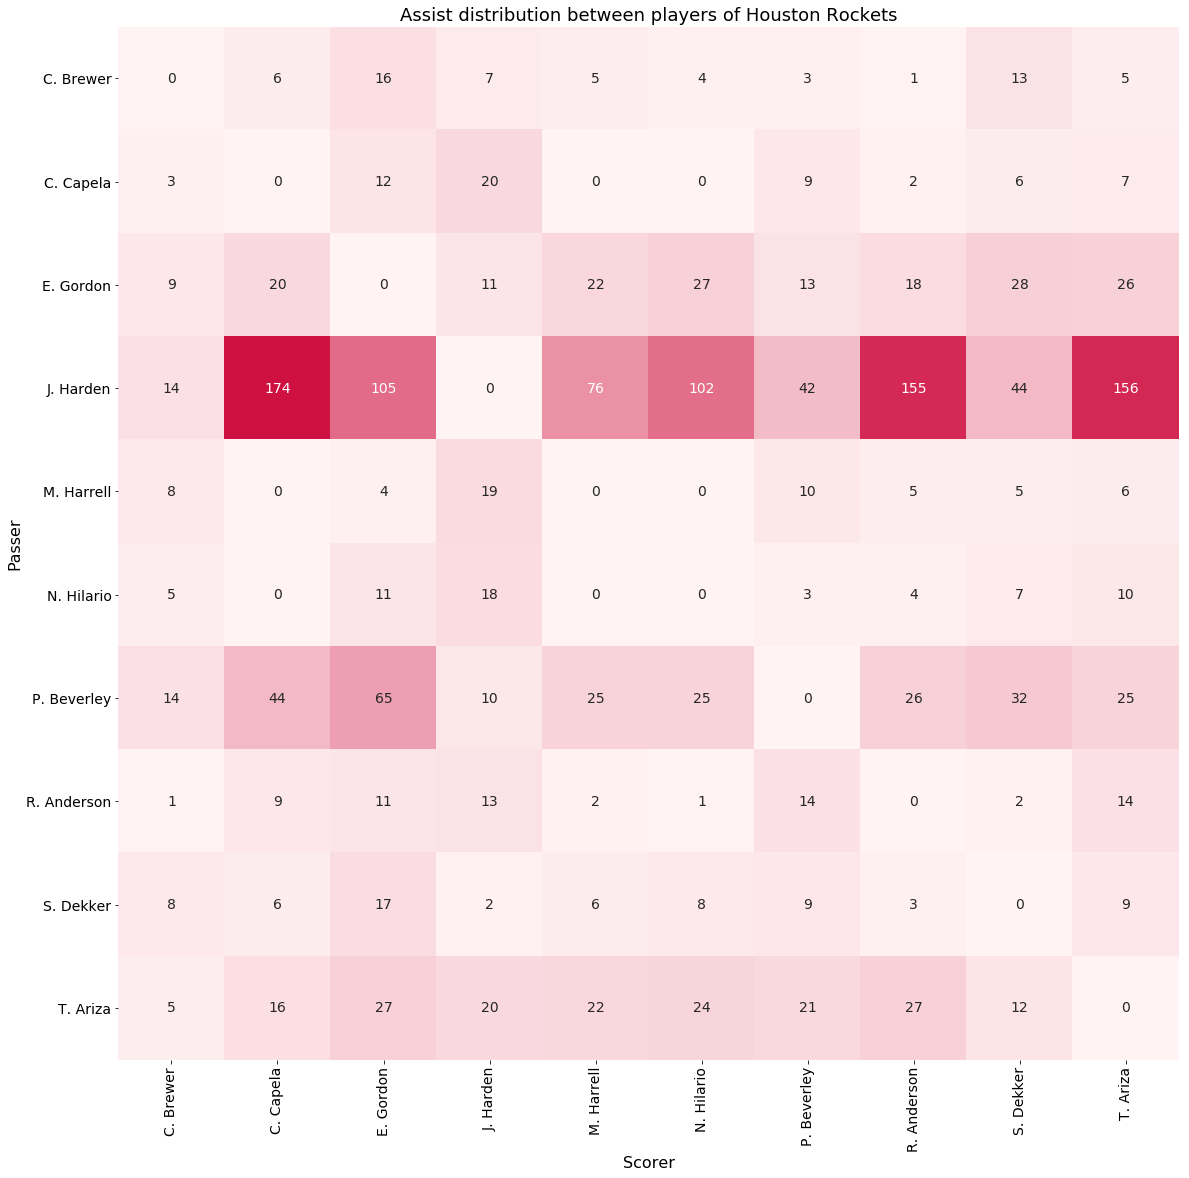

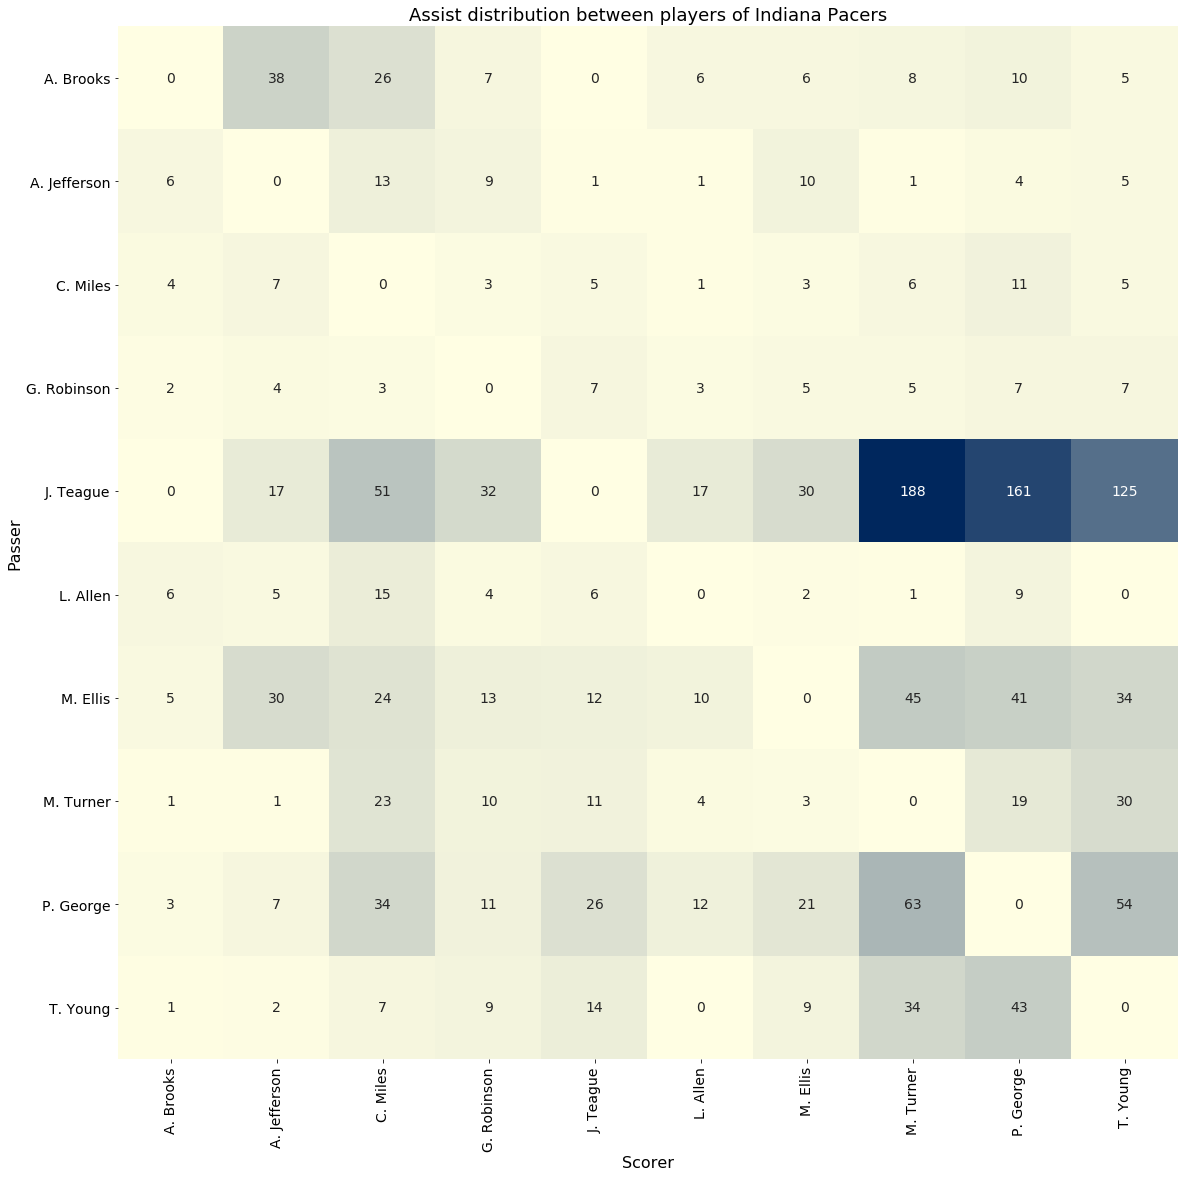

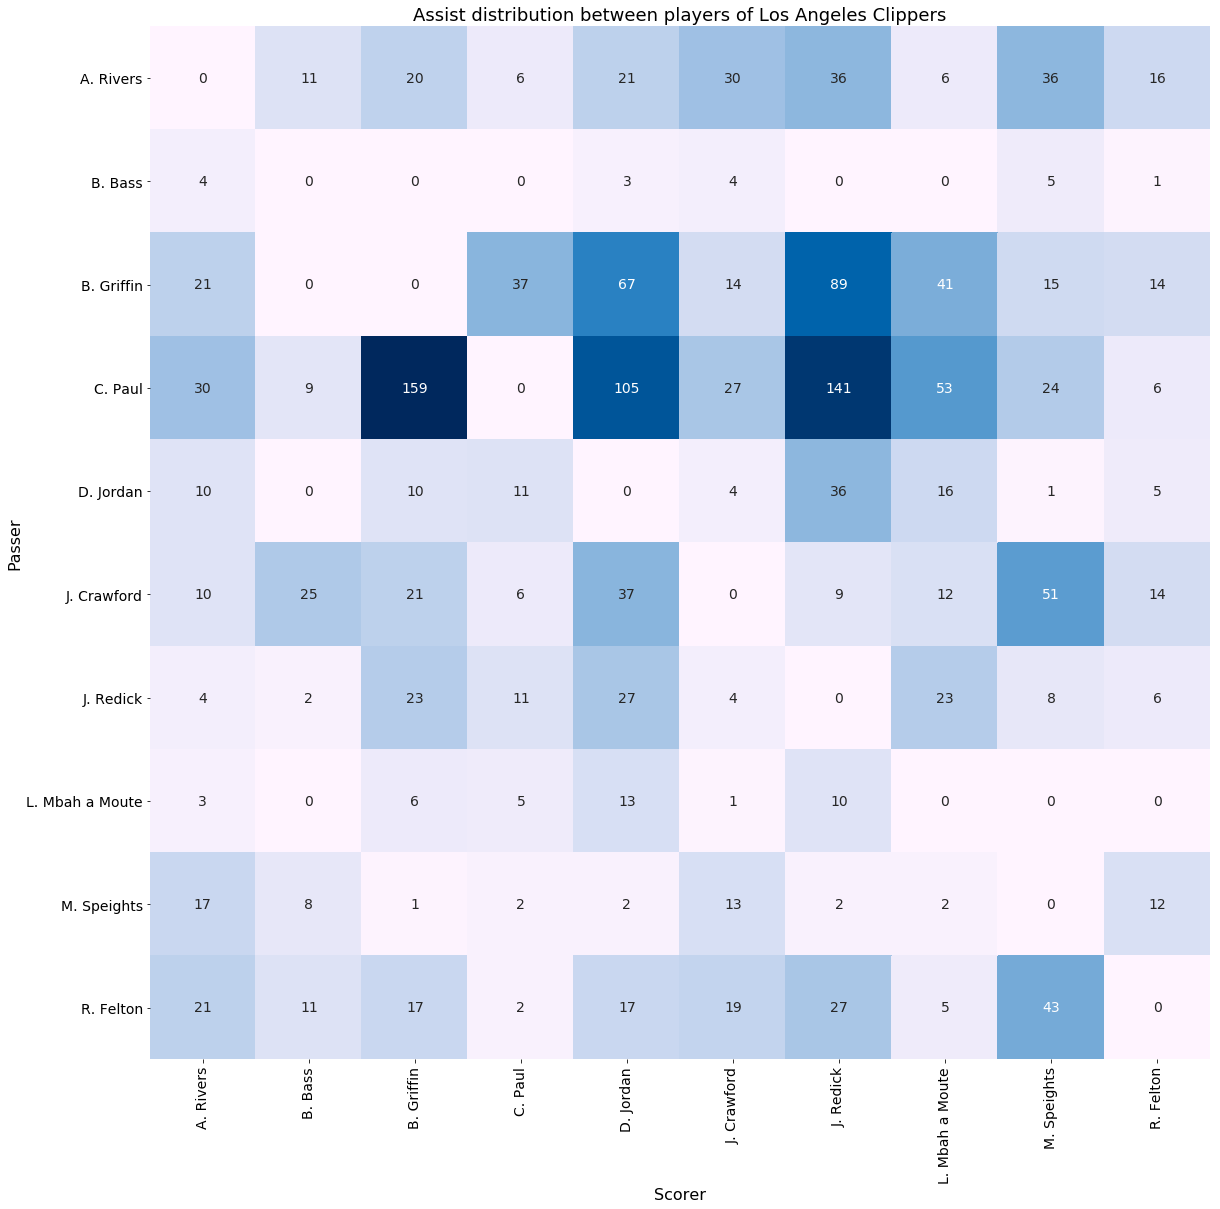

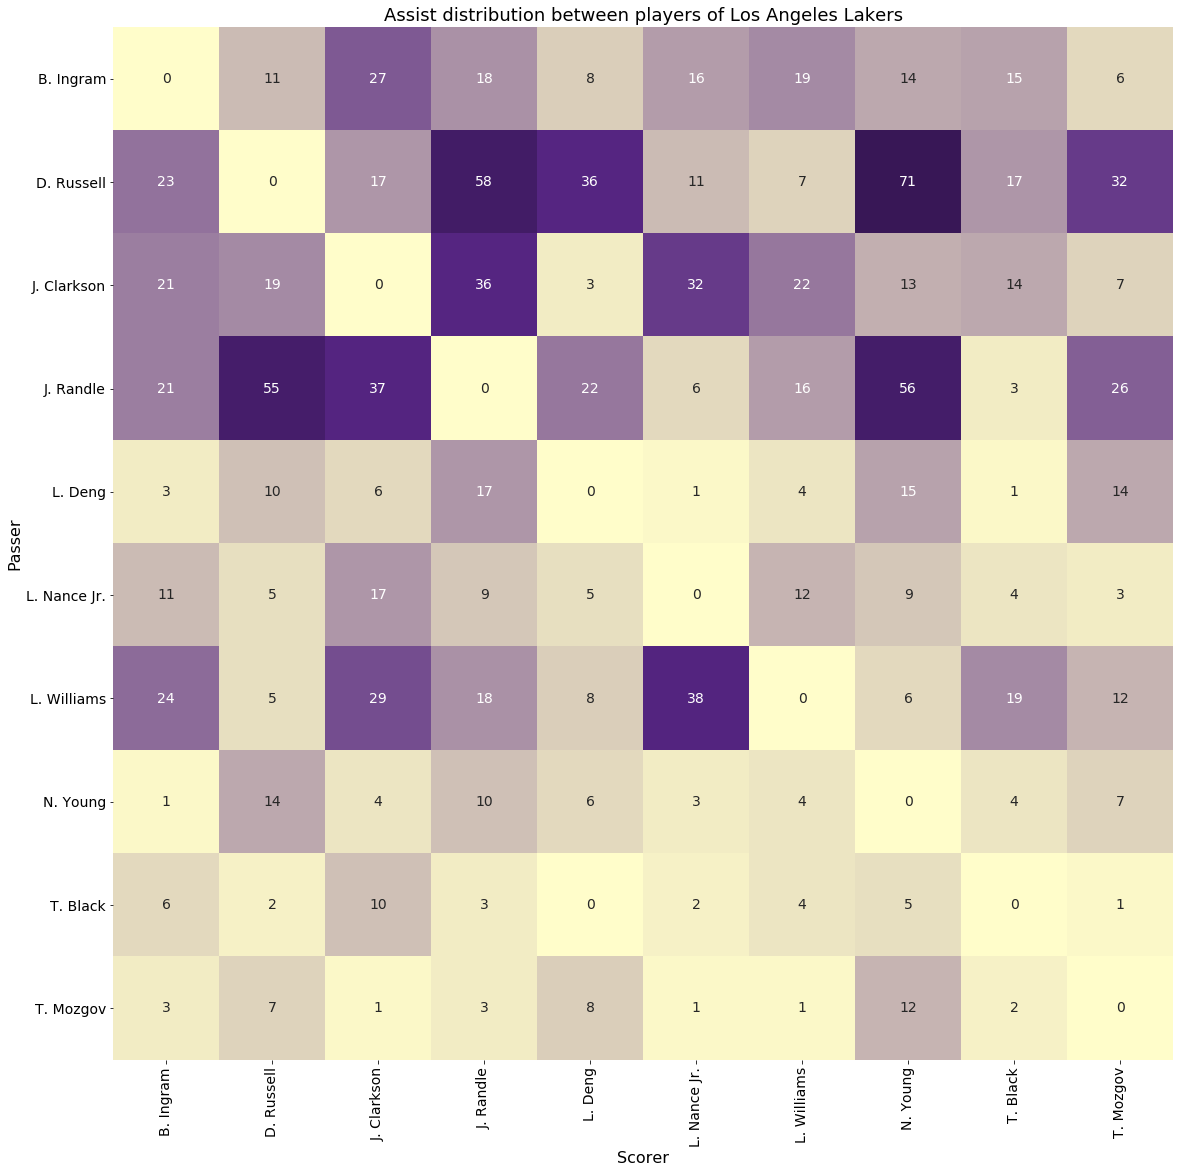

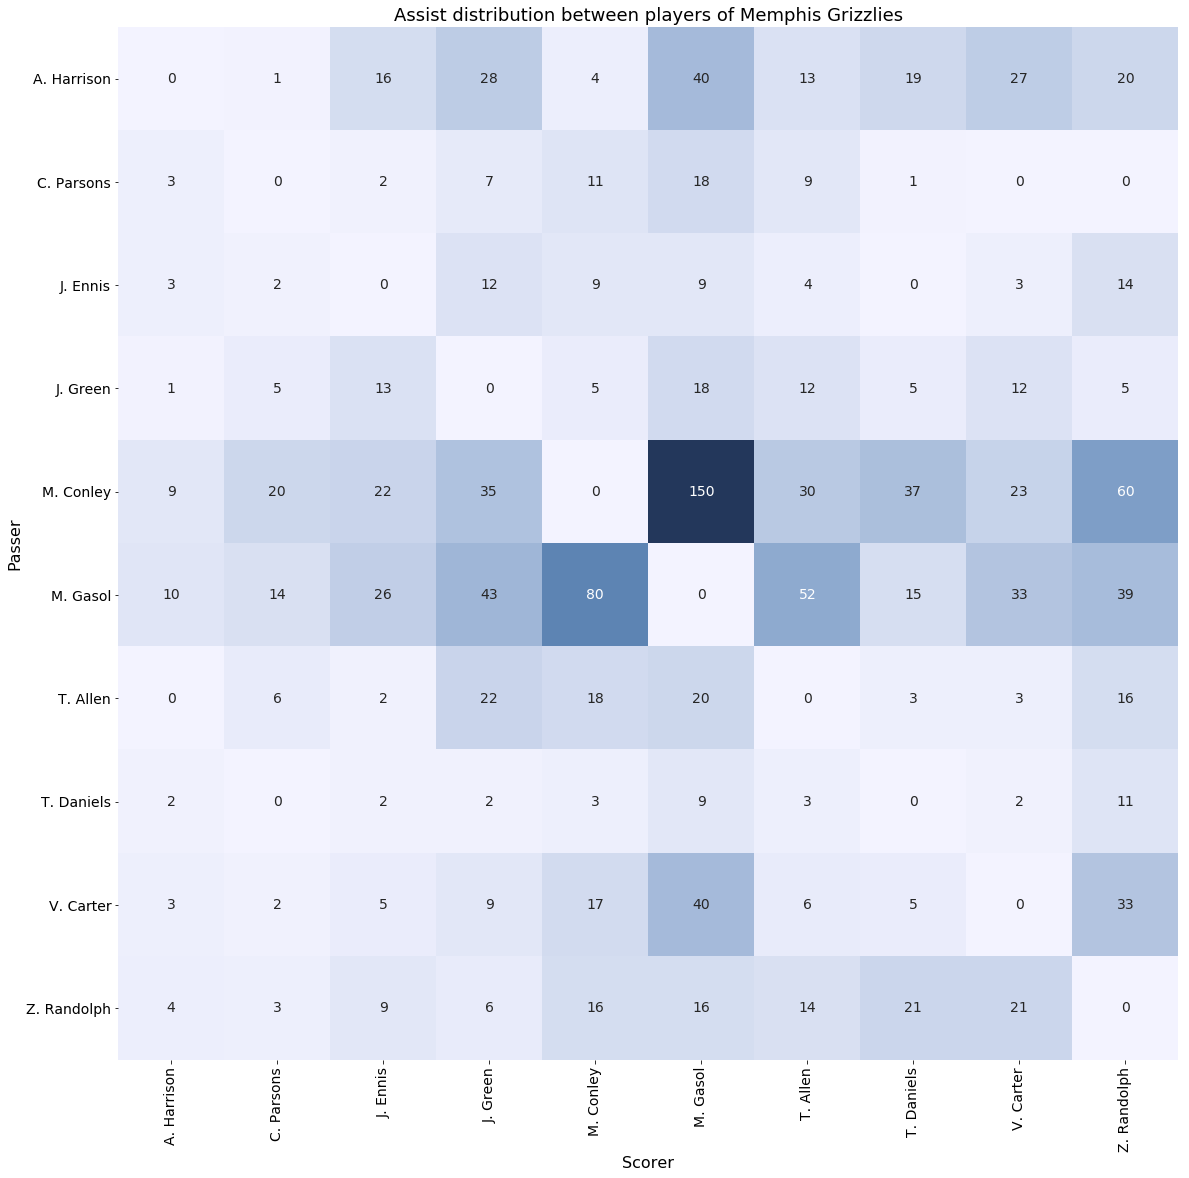

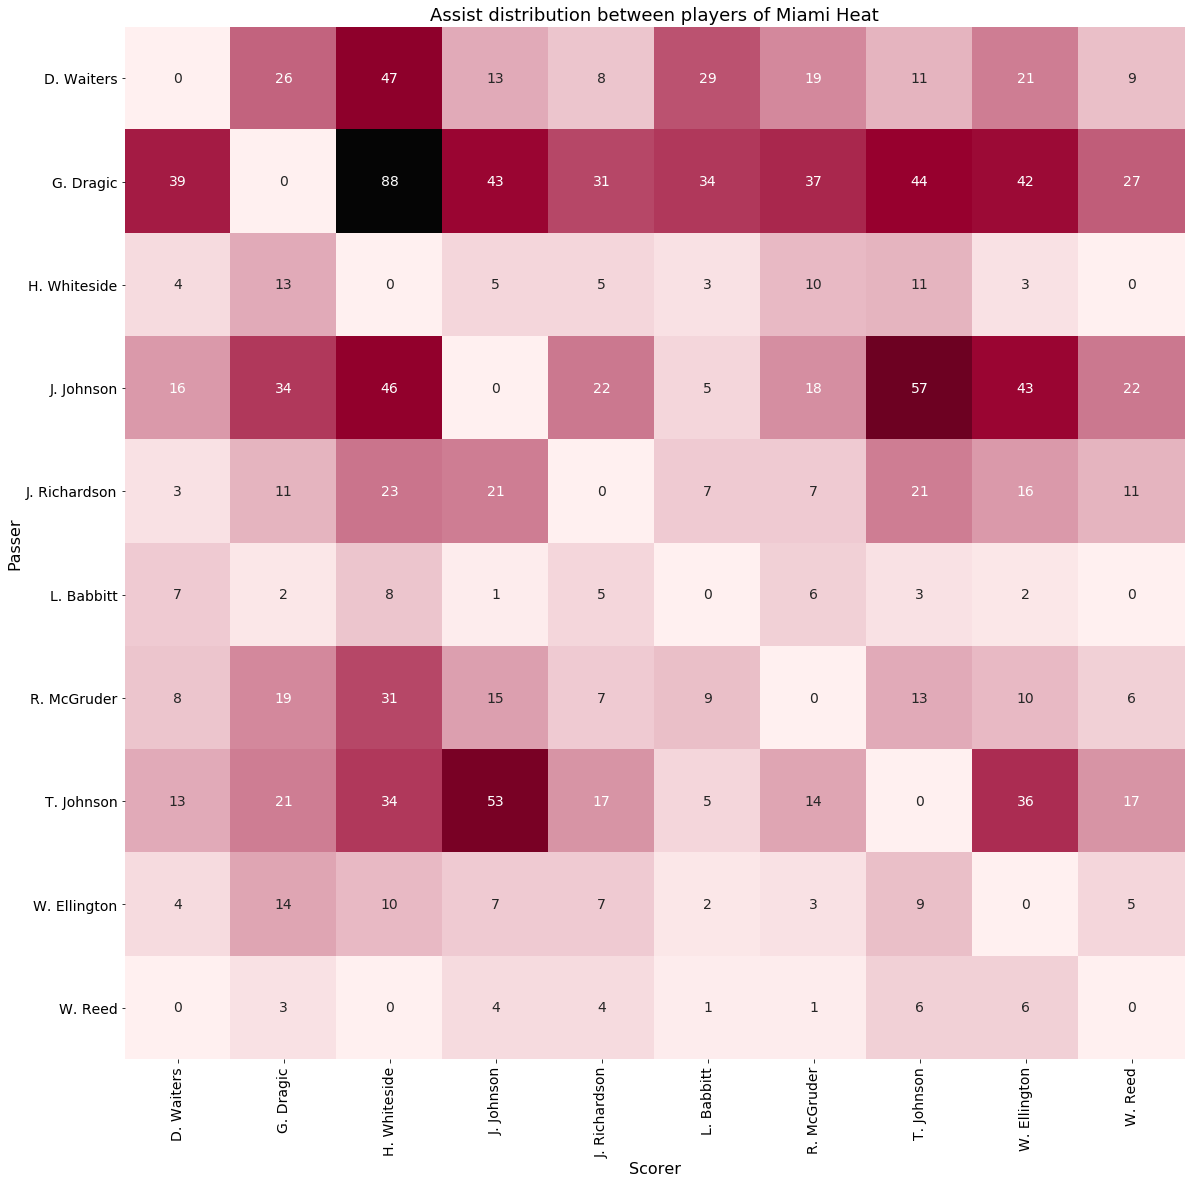

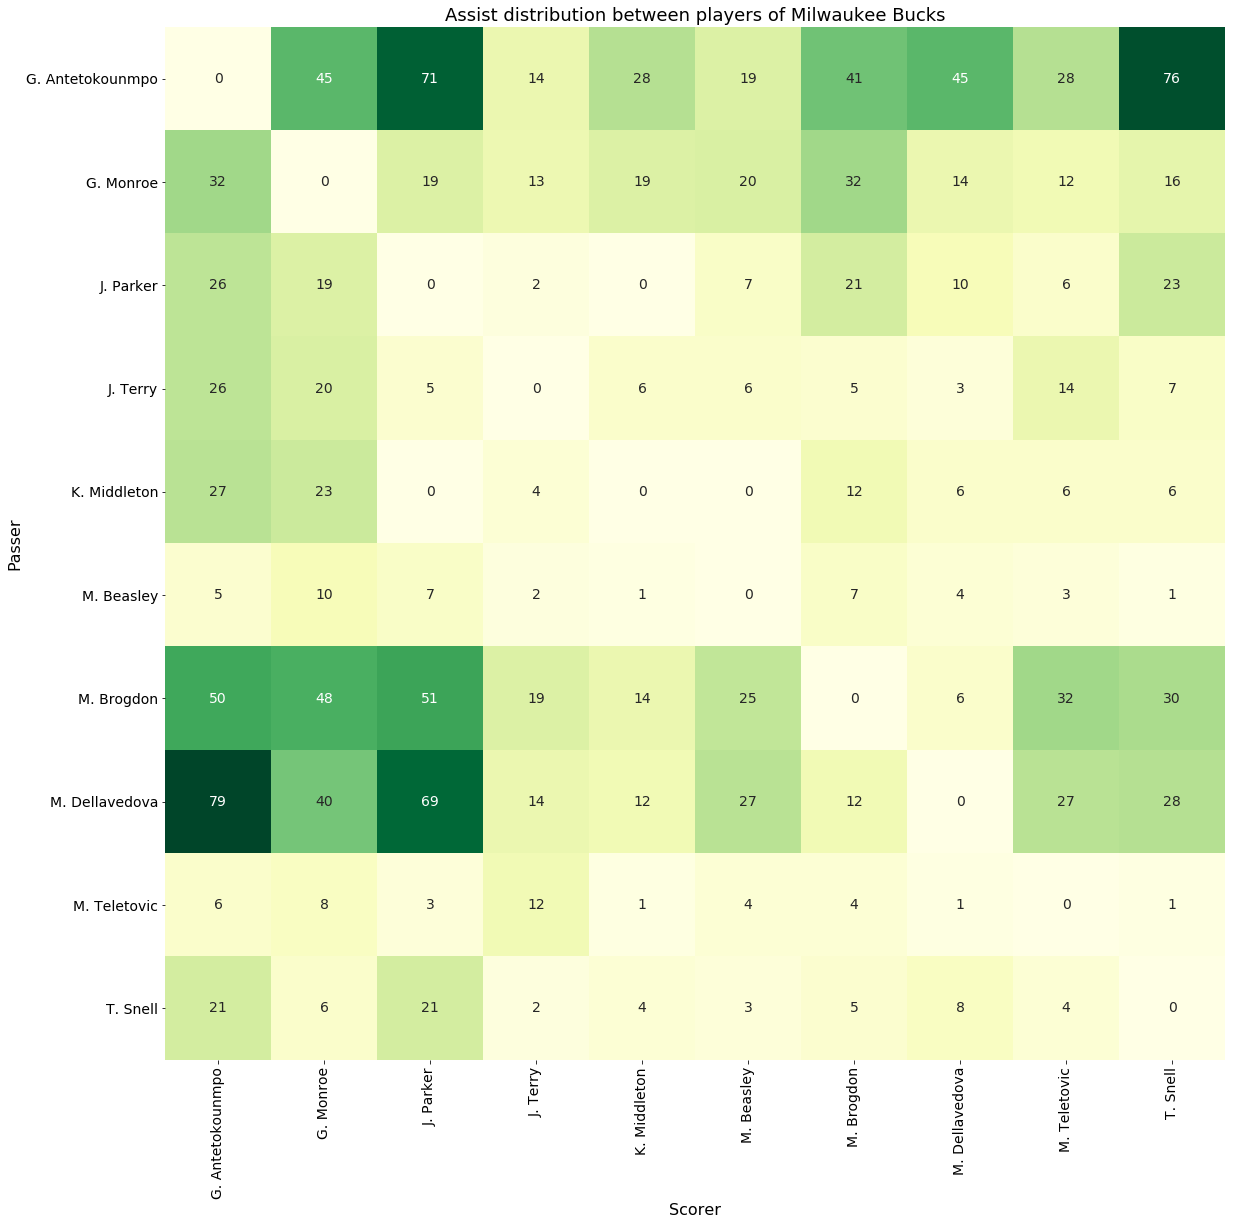

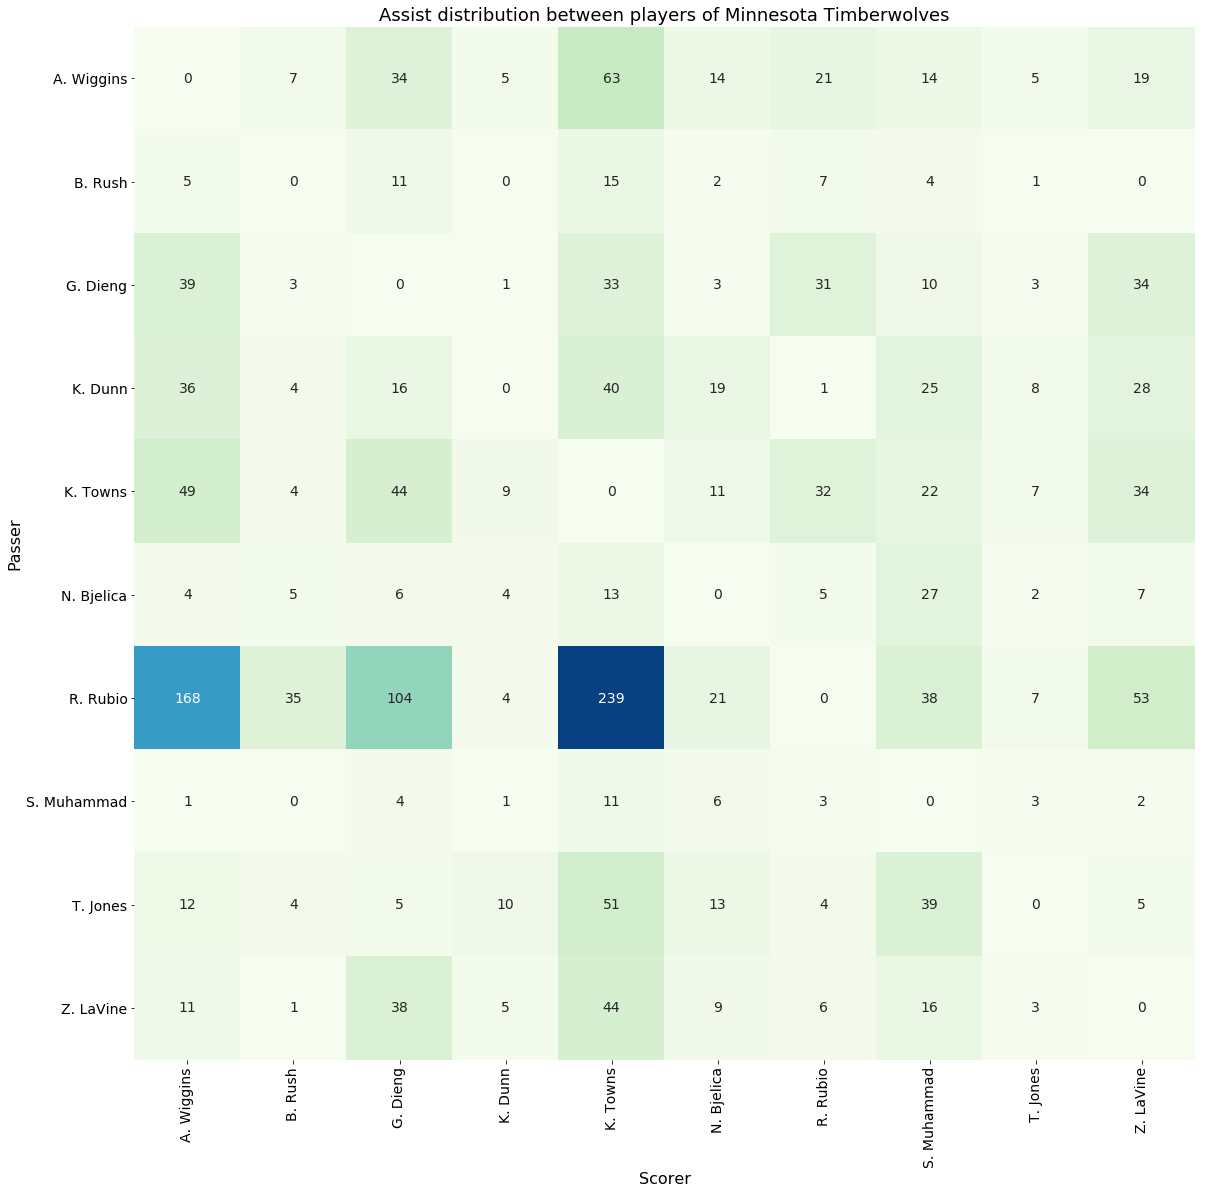

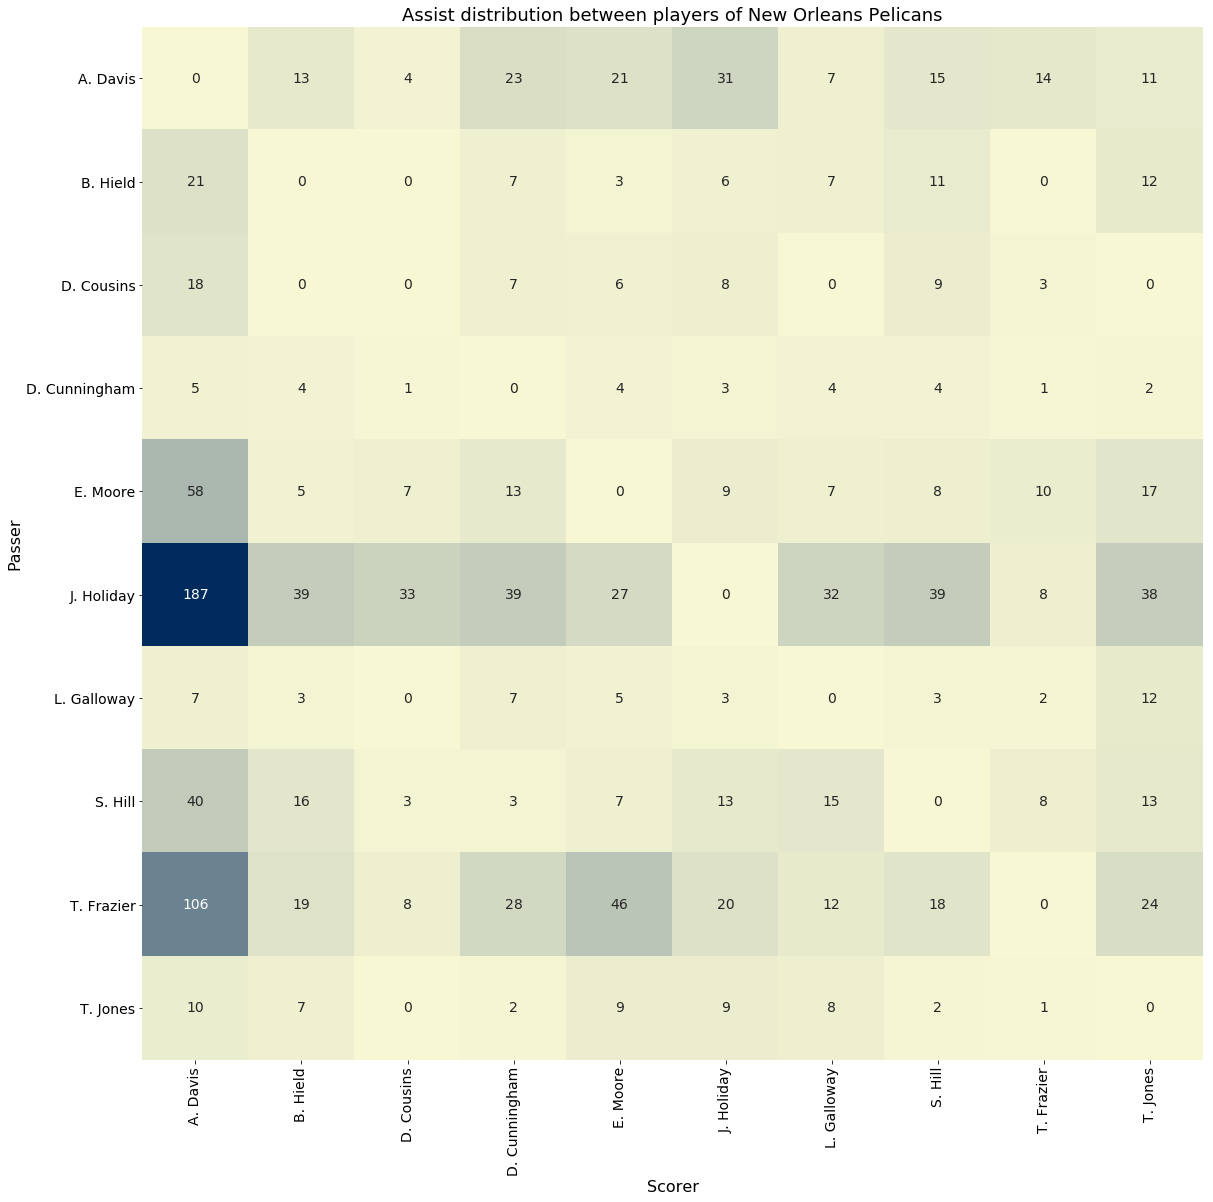

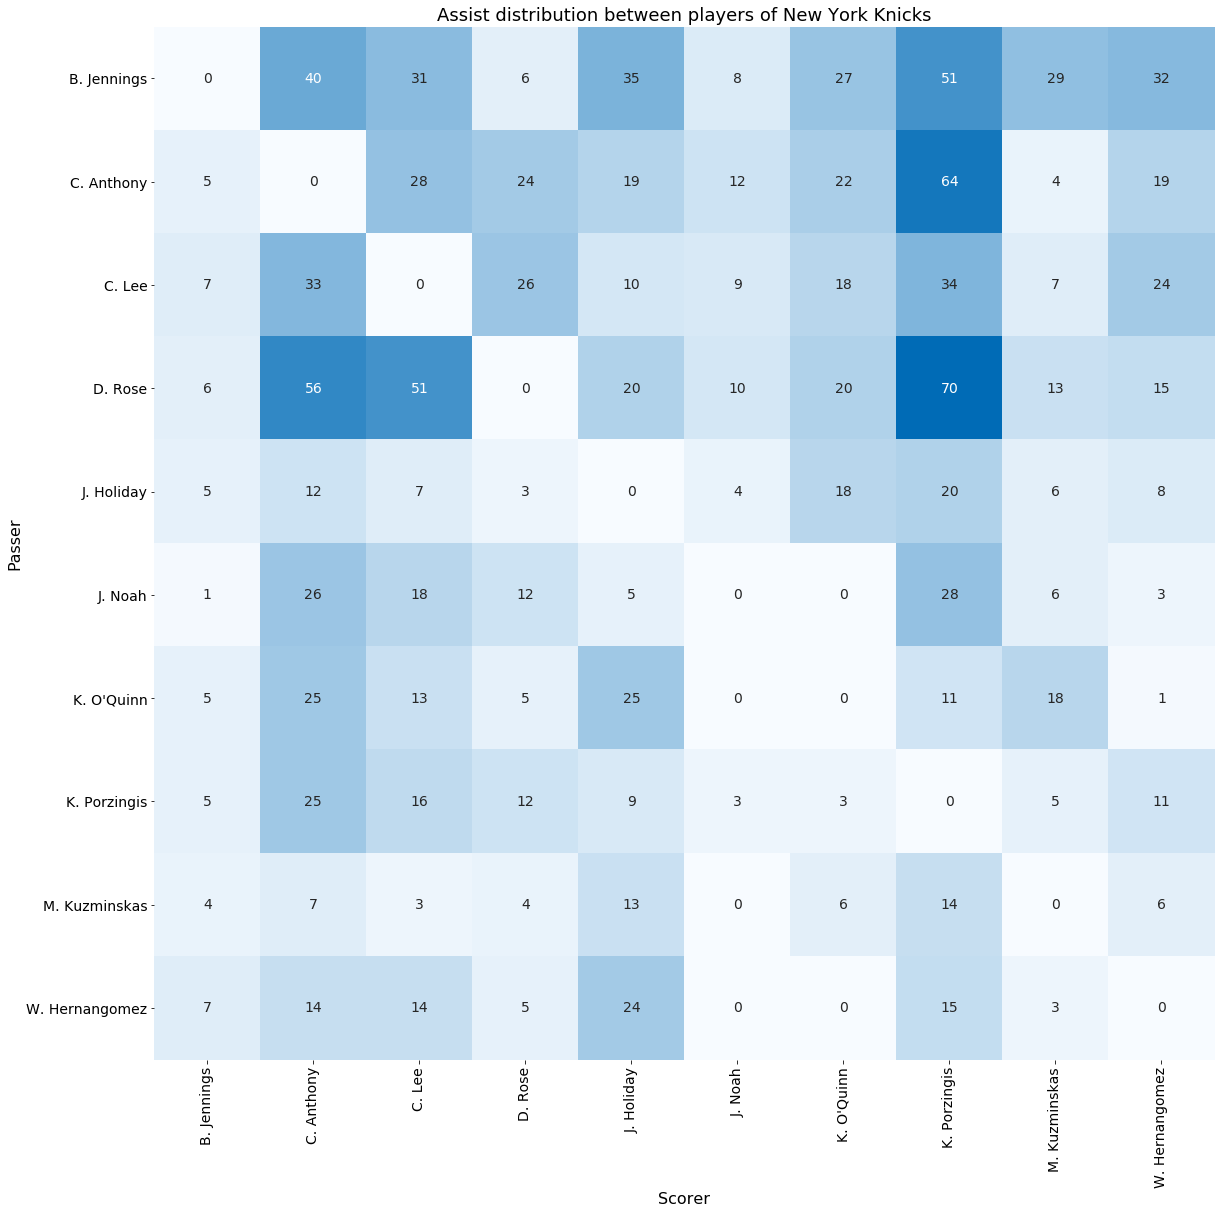

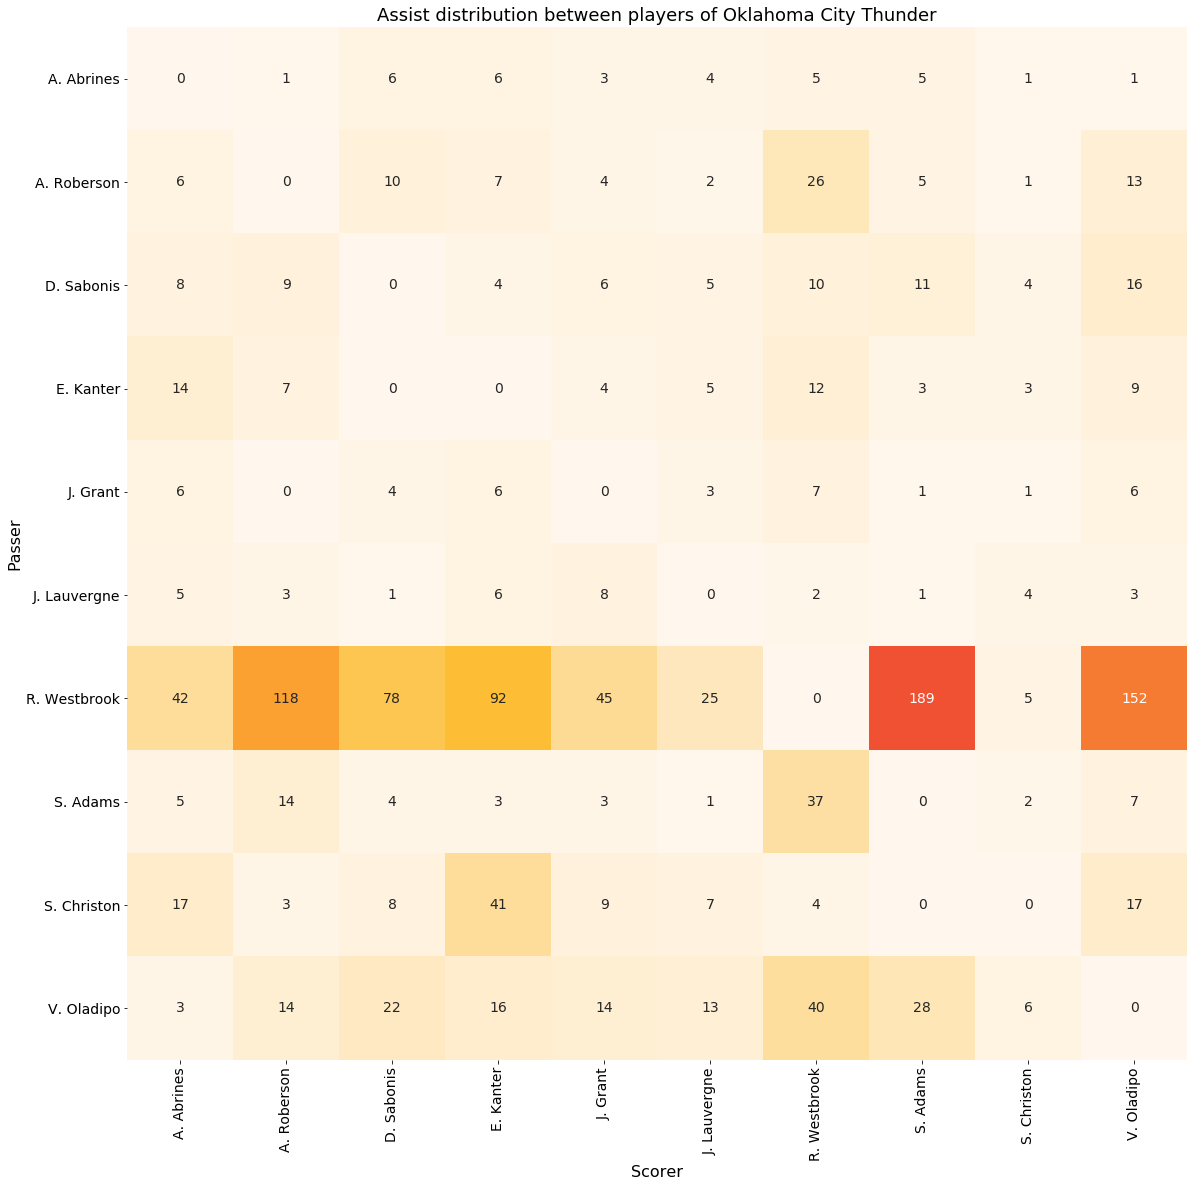

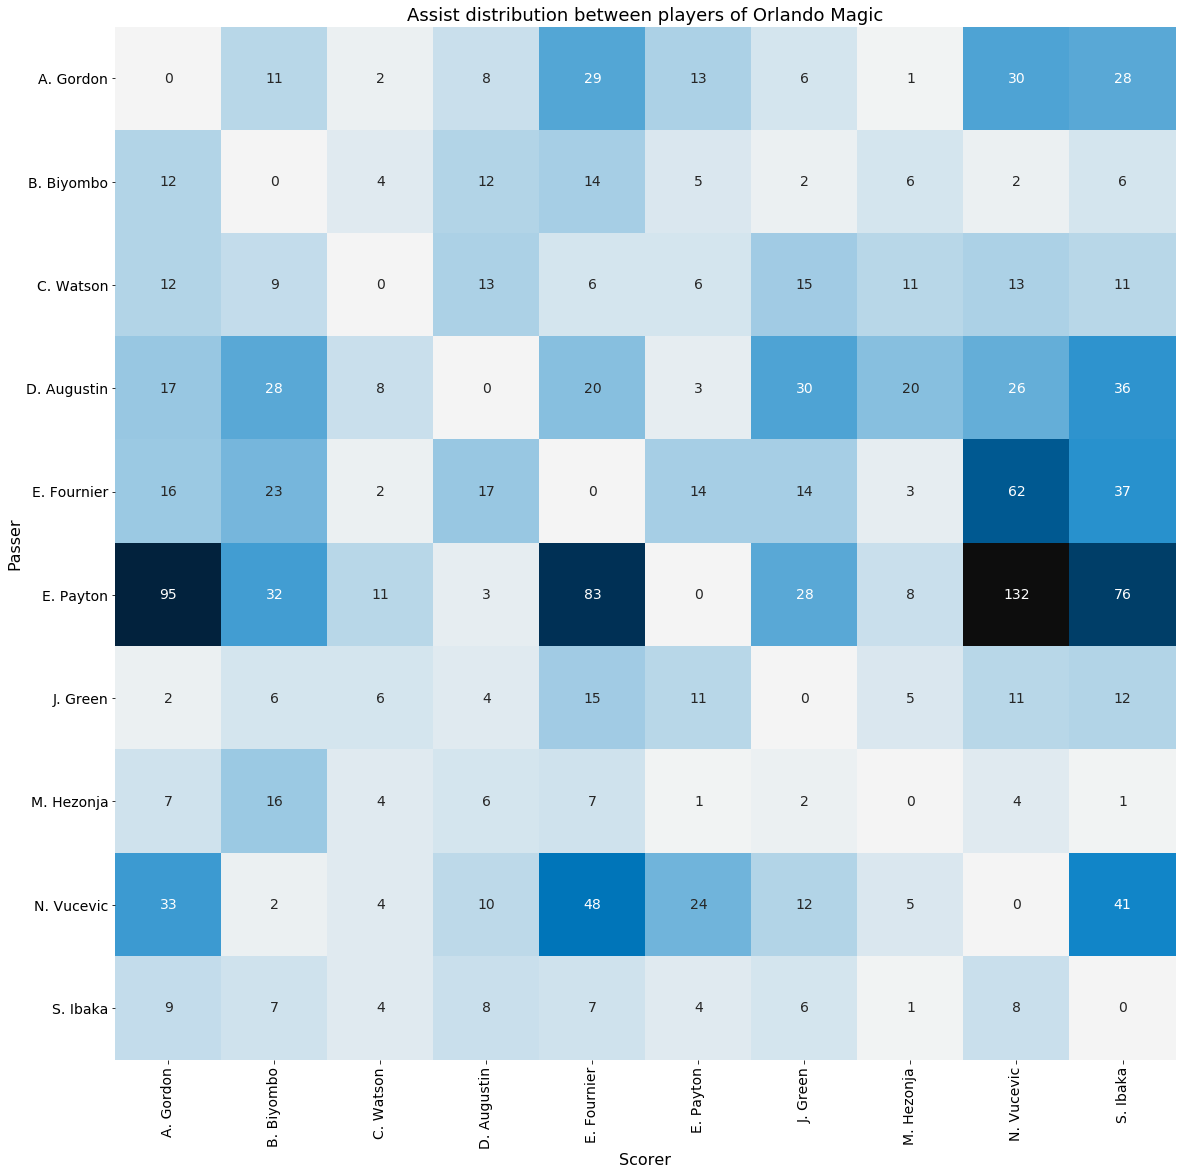

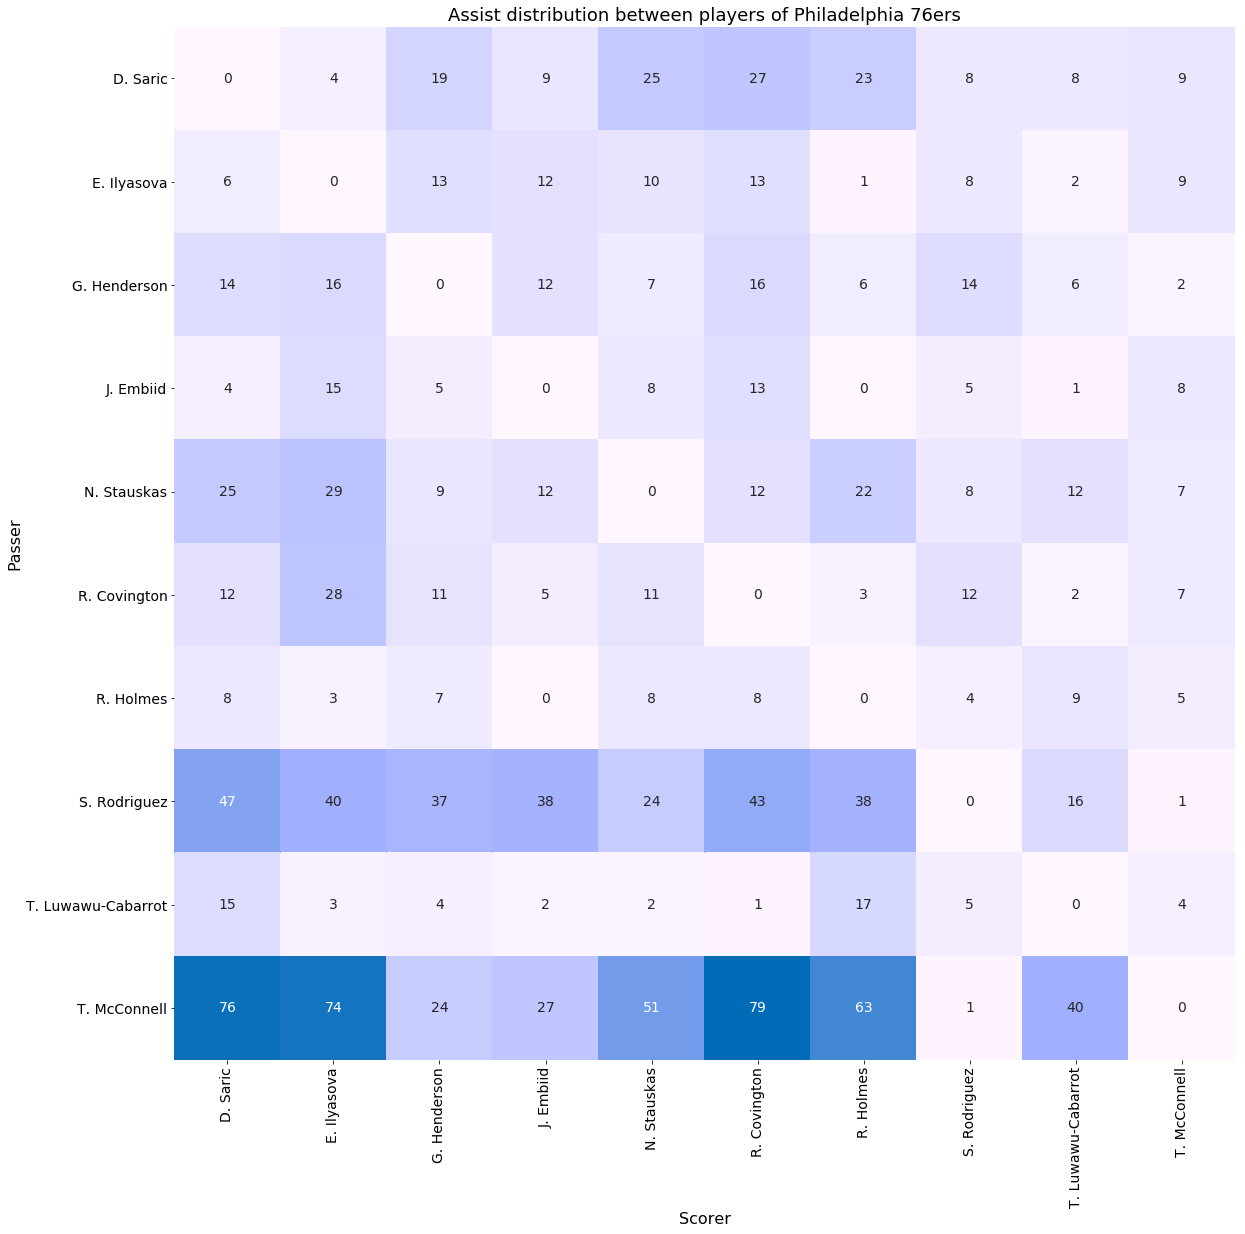

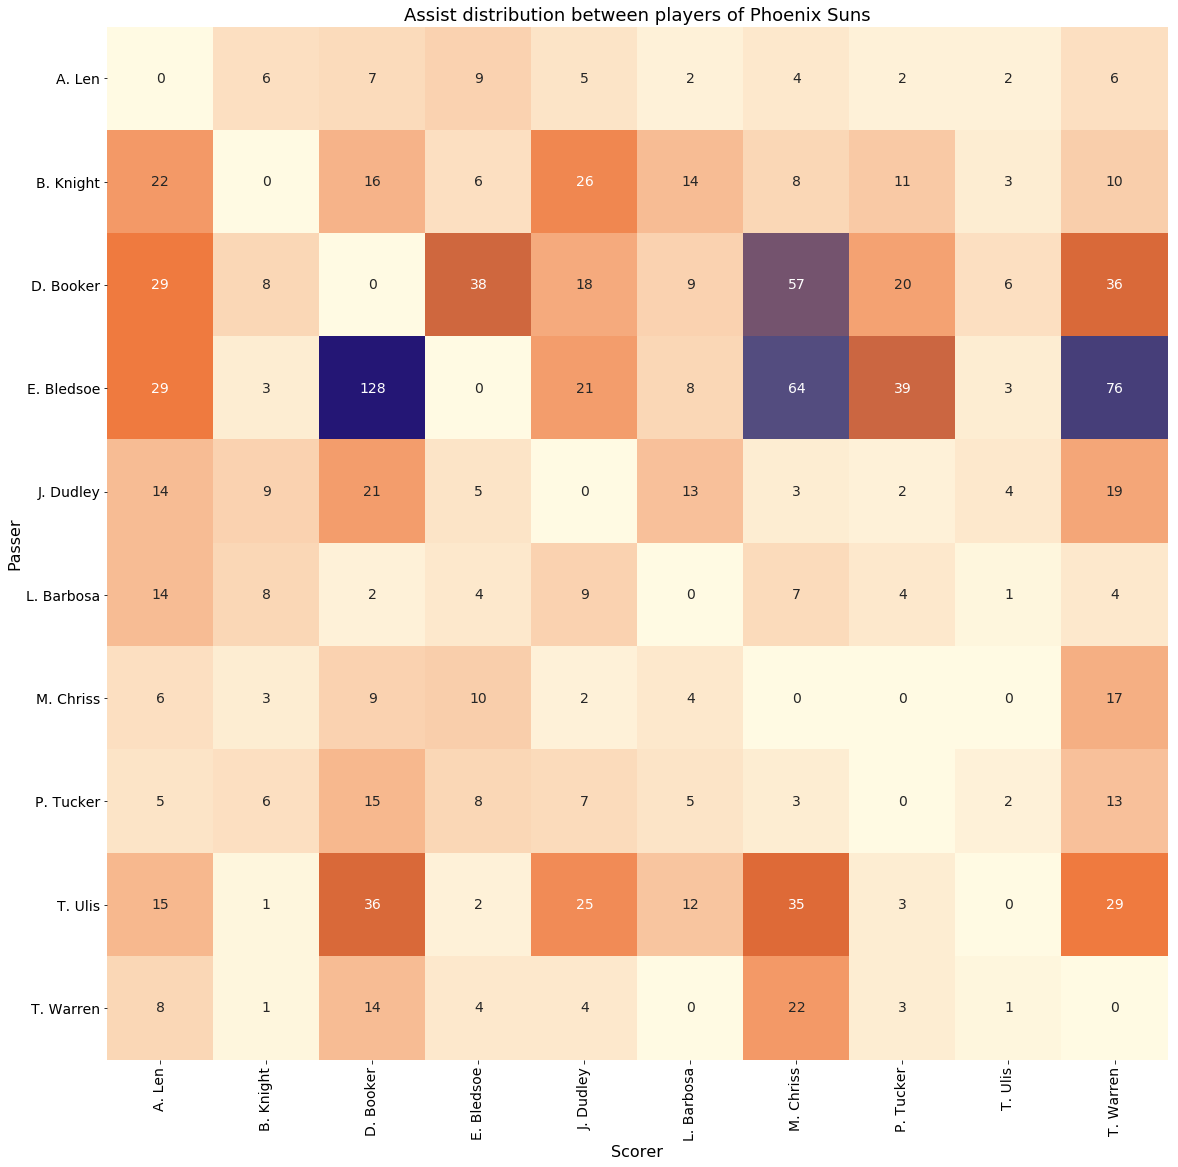

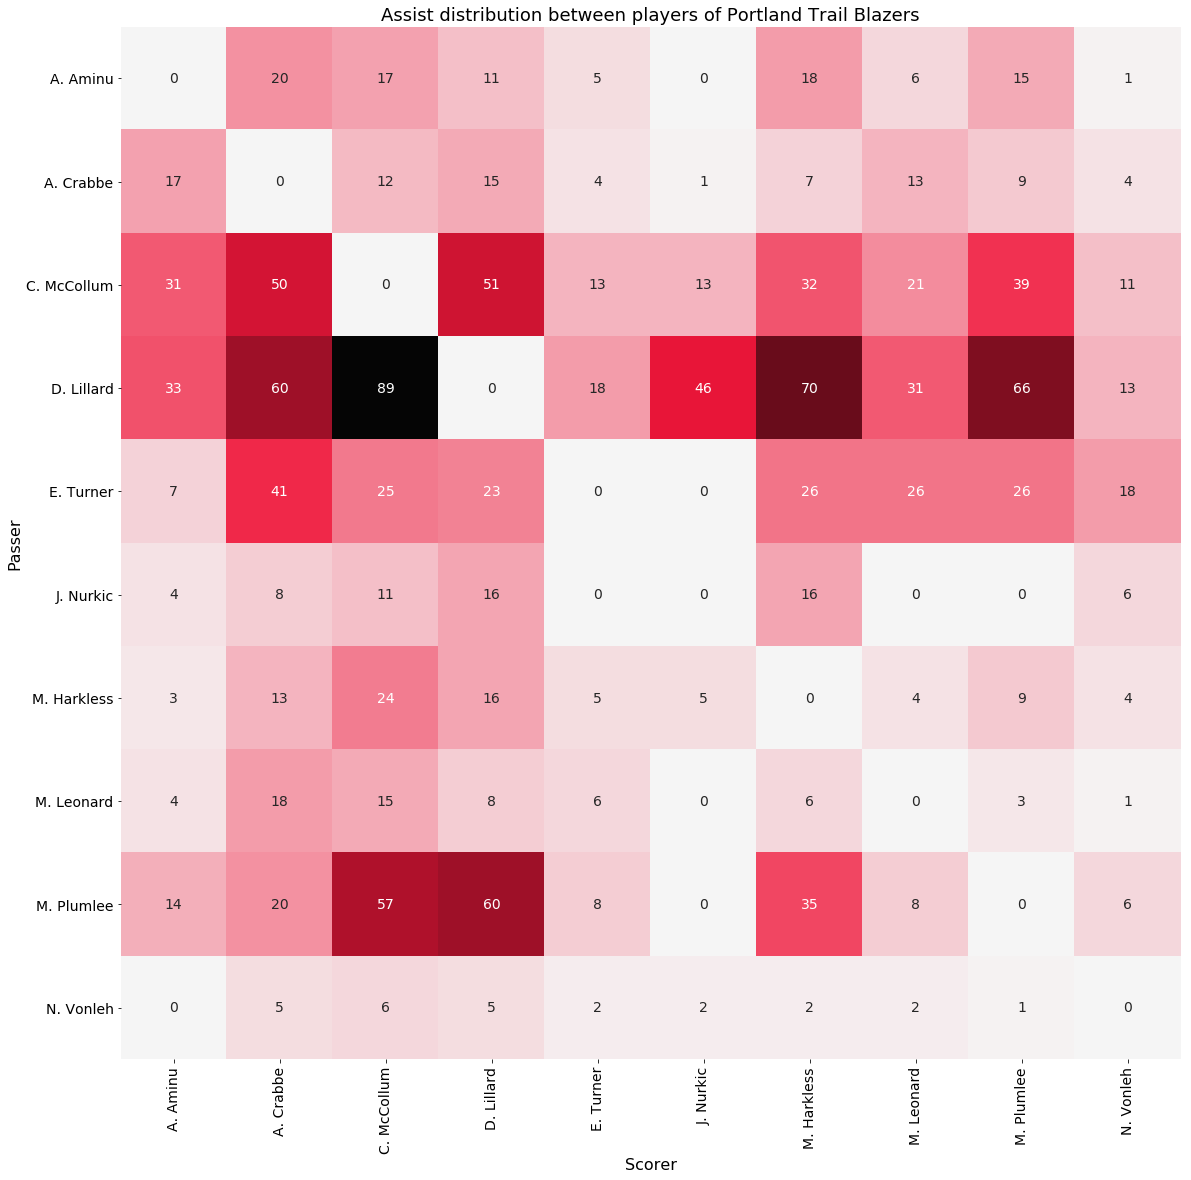

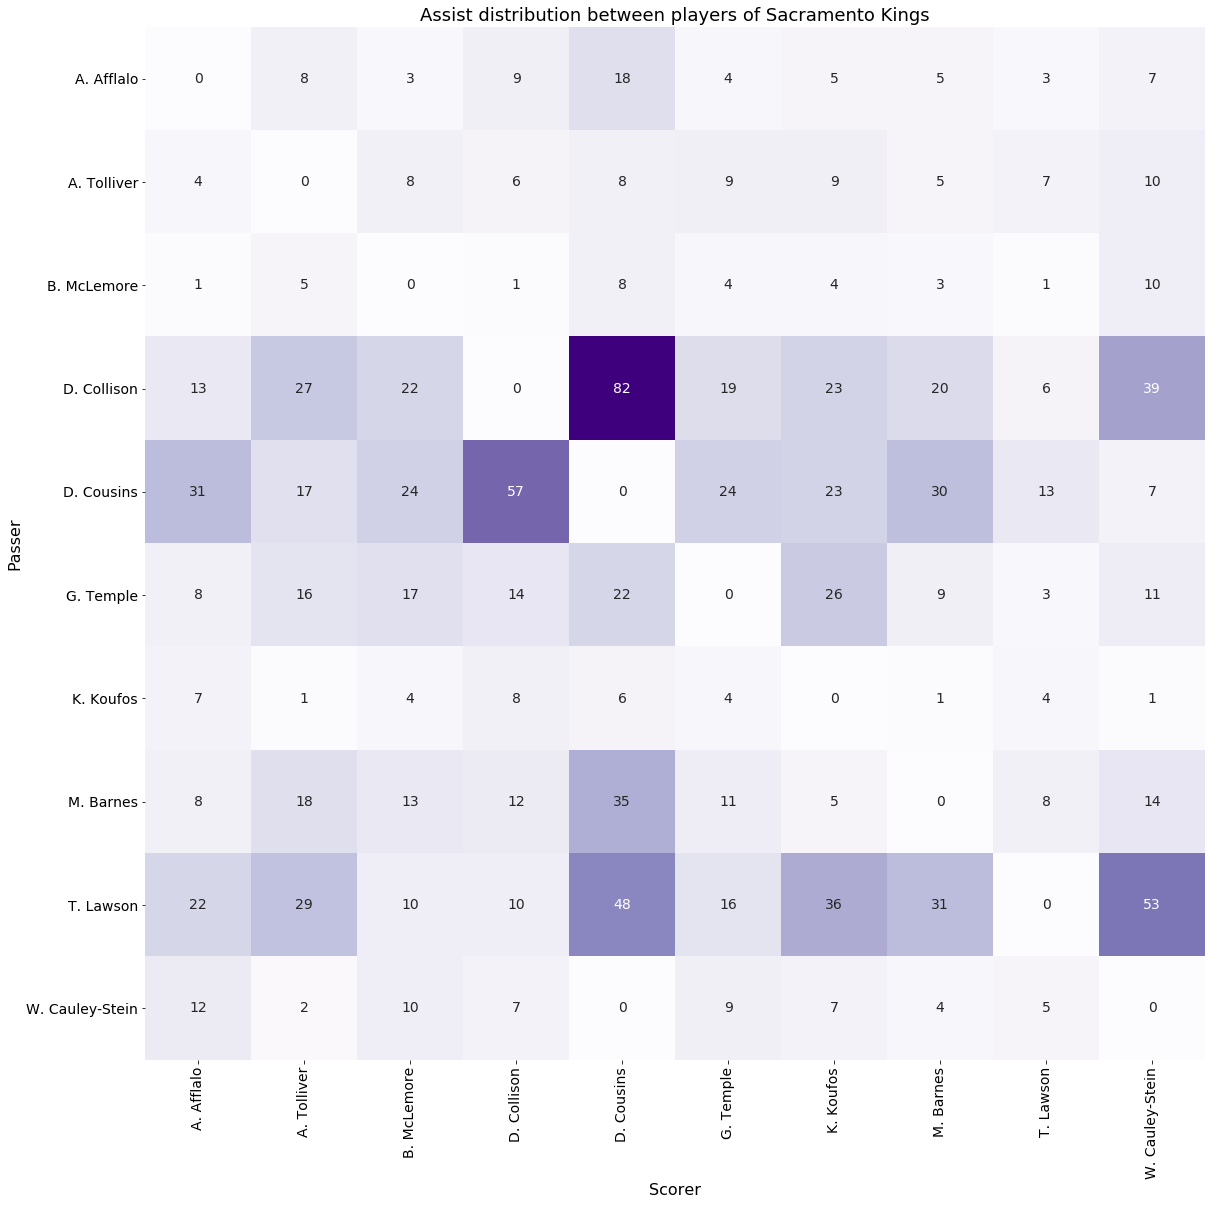

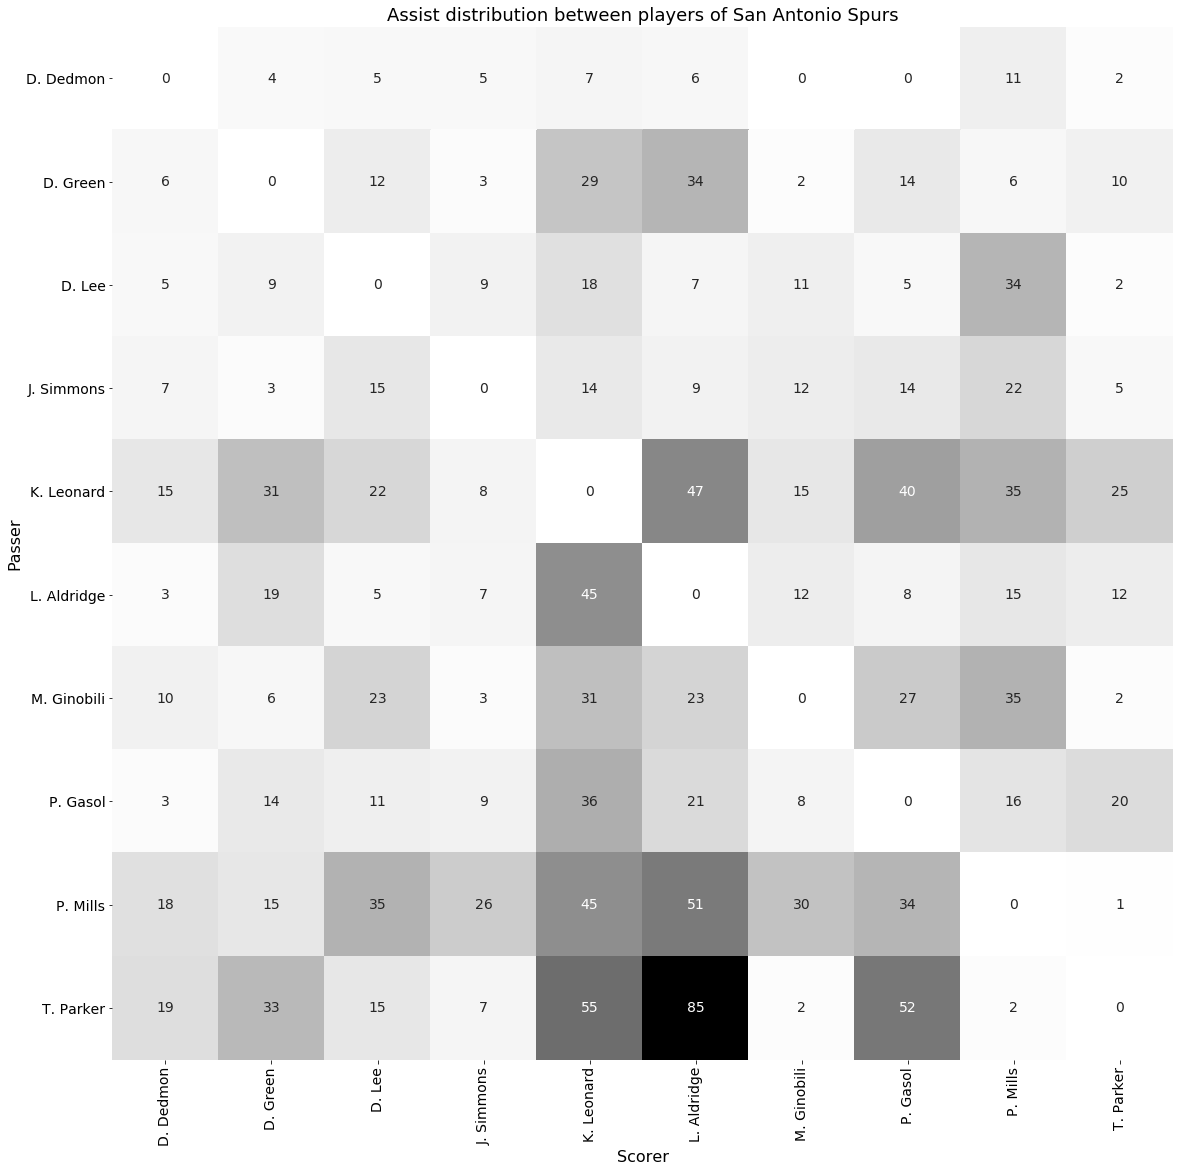

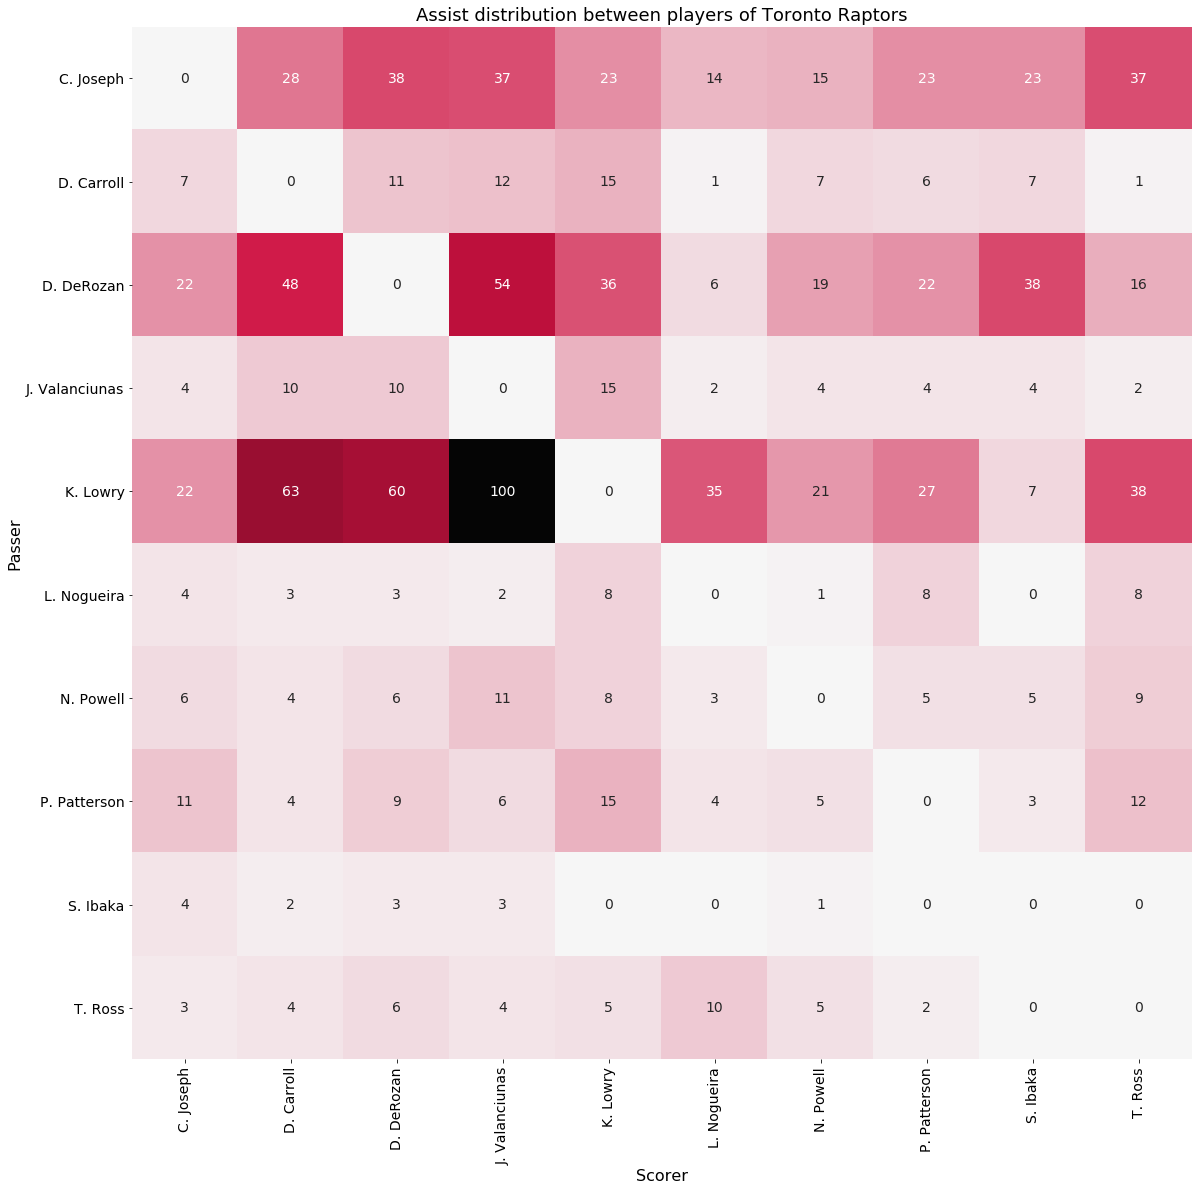

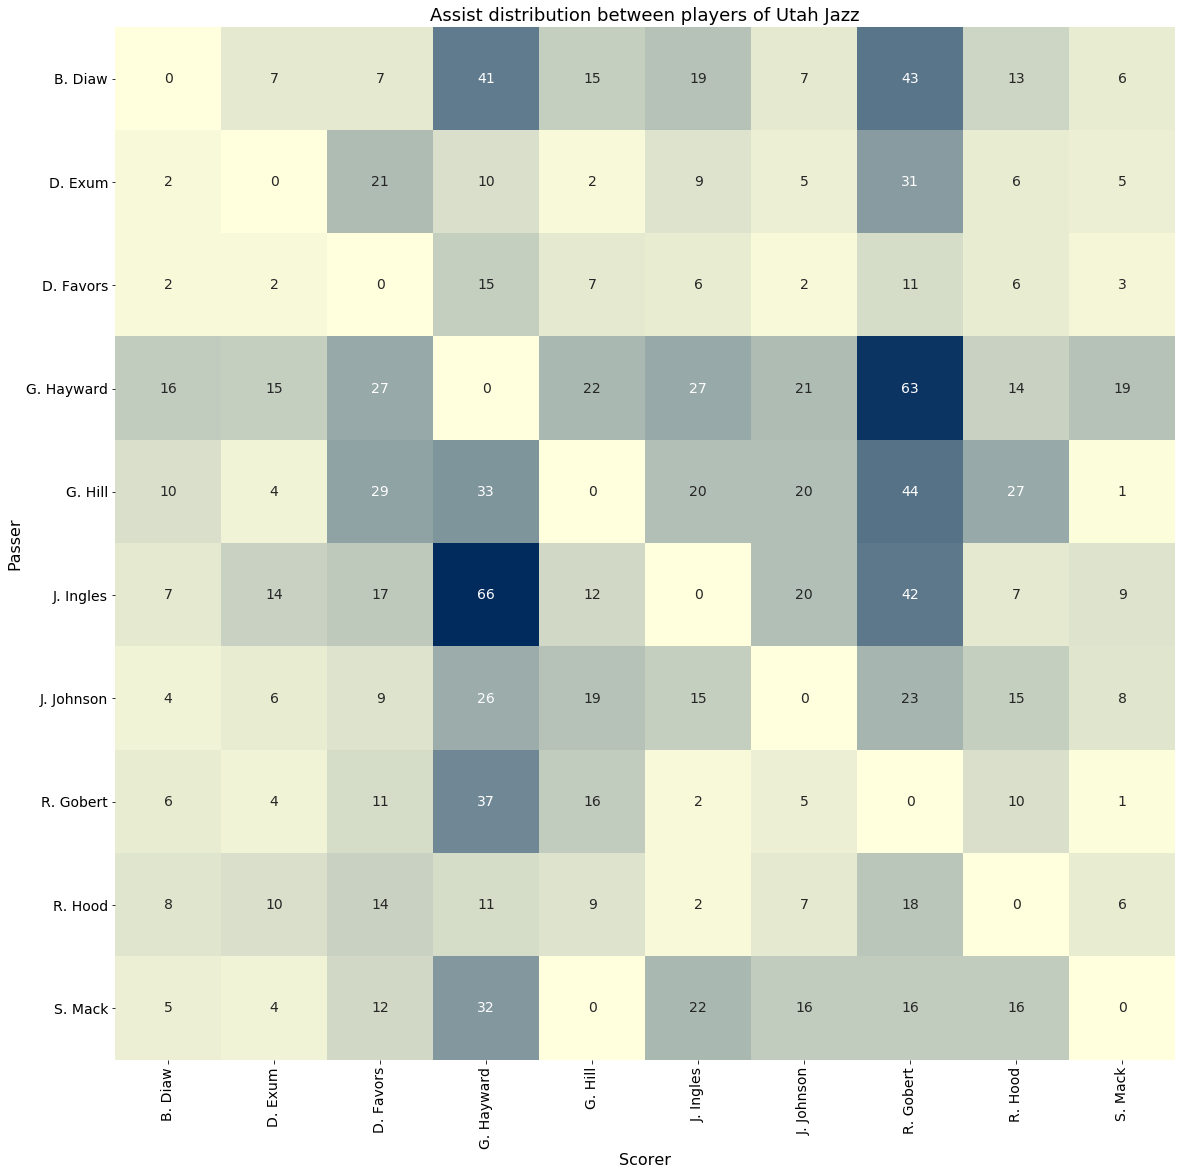

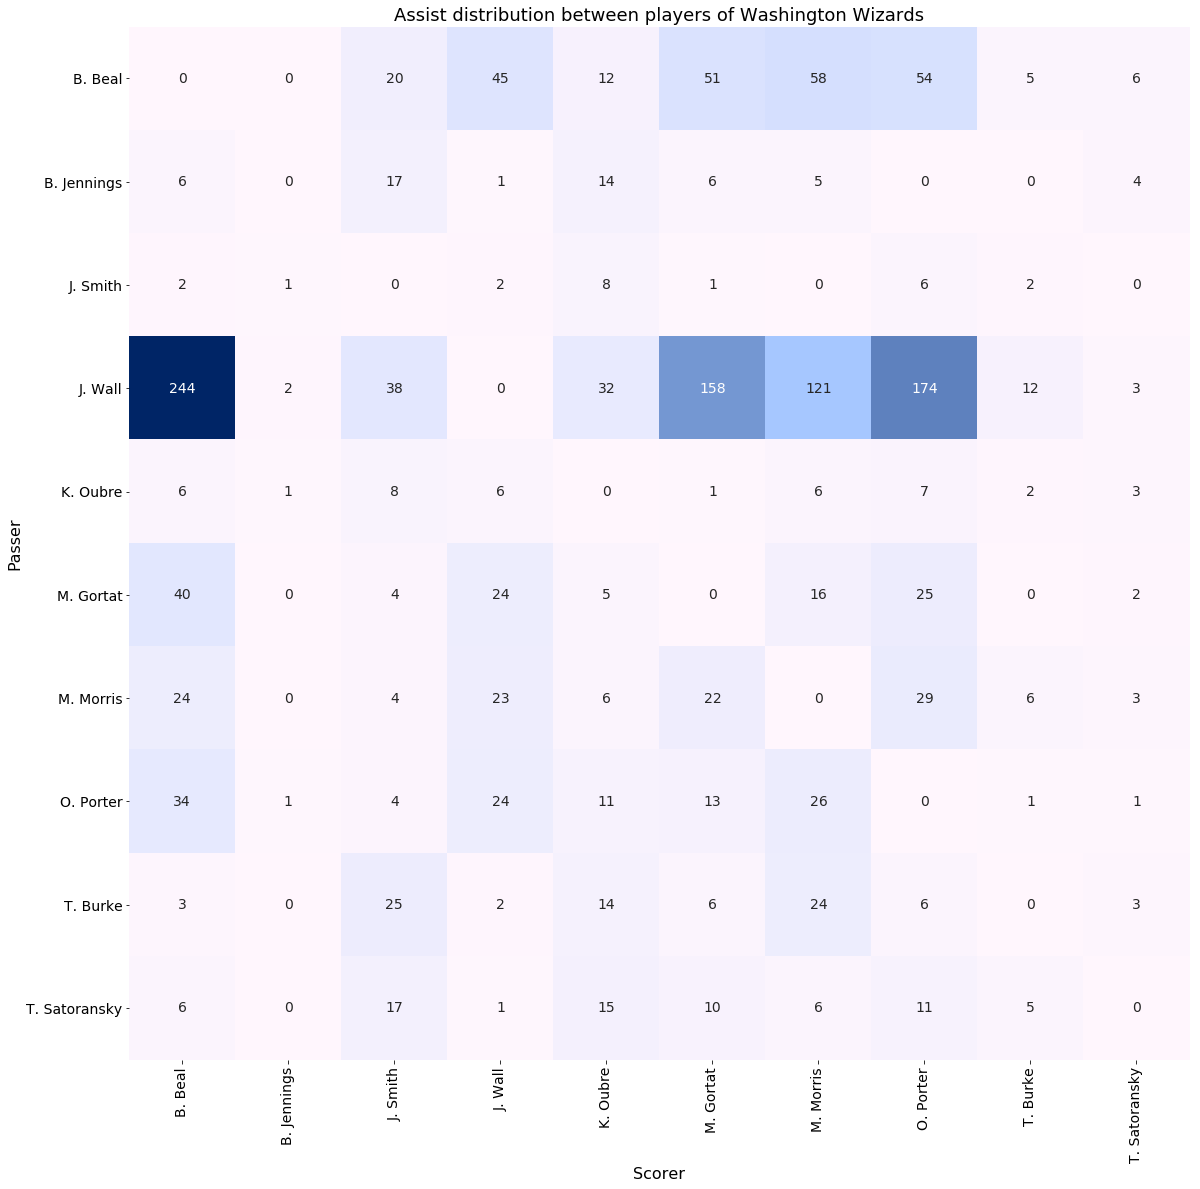

In [409]:
for team in nba_teams:
    frame = get_team_frame(team)
    plot_heatmap(frame, team)